In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns

import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
sns.set_theme()
print("imported")

imported


In [2]:
data = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.T.head(60)

,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
Id,1,2,3,4,5,6,7,8,9,10,...,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
MSSubClass,60,20,60,70,60,50,20,60,50,190,...,90,20,180,20,20,60,20,70,20,20
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,...,RL,RL,RM,RL,FV,RL,RL,RL,RL,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0,85.0,75.0,NaN,51.0,50.0,...,60.0,78.0,35.0,90.0,62.0,62.0,85.0,66.0,68.0,75.0
LotArea,8450,9600,11250,9550,14260,14115,10084,10382,6120,7420,...,9000,9262,3675,17217,7500,7917,13175,9042,9717,9937
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,...,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Pave,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1,IR1,Reg,IR1,Reg,Reg,...,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,...,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,...,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub


In [4]:
data.T.tail(20)

,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
GarageCars,2,2,2,3,3,2,2,2,2,1,...,0,3,2,0,2,2,2,1,1,1
GarageArea,548,460,608,642,836,480,636,484,468,205,...,0,840,525,0,400,460,500,252,240,276
GarageQual,TA,TA,TA,TA,TA,TA,TA,TA,Fa,Gd,...,NaN,TA,TA,NaN,TA,TA,TA,TA,TA,TA
GarageCond,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,...,NaN,TA,TA,NaN,TA,TA,TA,TA,TA,TA
PavedDrive,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,...,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
WoodDeckSF,0,298,0,0,192,40,255,235,90,0,...,32,0,0,36,0,0,349,0,366,736
OpenPorchSF,61,0,42,35,84,30,57,204,0,4,...,45,36,28,56,113,40,0,60,0,68
EnclosedPorch,0,0,0,272,0,0,0,228,205,0,...,0,0,0,0,0,0,0,0,112,0
3SsnPorch,0,0,0,0,0,320,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ScreenPorch,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
nulls = ((data.isnull().sum()/len(data))*100).to_frame().rename(columns = {0:"null_percent"})

# -- checking for features which are having more than 40 percentage of null values
nulls[nulls["null_percent"] > 40]

,null_percent
Alley,93.767123
FireplaceQu,47.260274
PoolQC,99.520548
Fence,80.753425
MiscFeature,96.301370


In [6]:
 # -- columns which has more than 40 percent null values in it are dropped

data.drop(nulls[nulls["null_percent"] > 40].index, axis = 1, inplace = True)

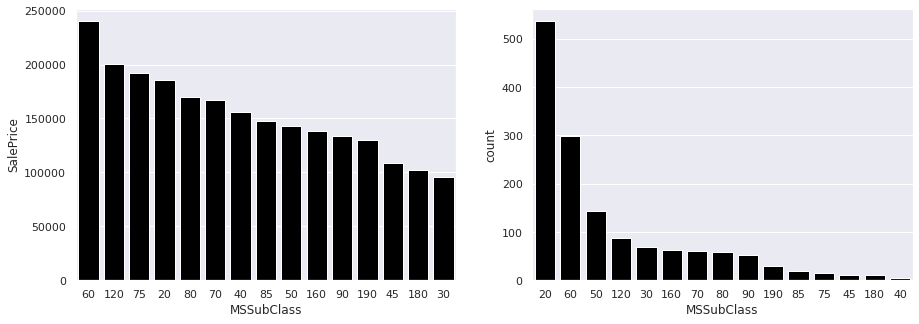

In [7]:
x = data.groupby(["MSSubClass"])["SalePrice"].mean().to_frame().sort_values("SalePrice").reset_index()

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.barplot(x["MSSubClass"], x["SalePrice"], 
            order = x.sort_values("SalePrice", ascending = False).MSSubClass, 
            color = "black")

plt.subplot(1,2,2)
sns.countplot(data["MSSubClass"], color = "black", 
              order = data["MSSubClass"].value_counts().index)

plt.show()

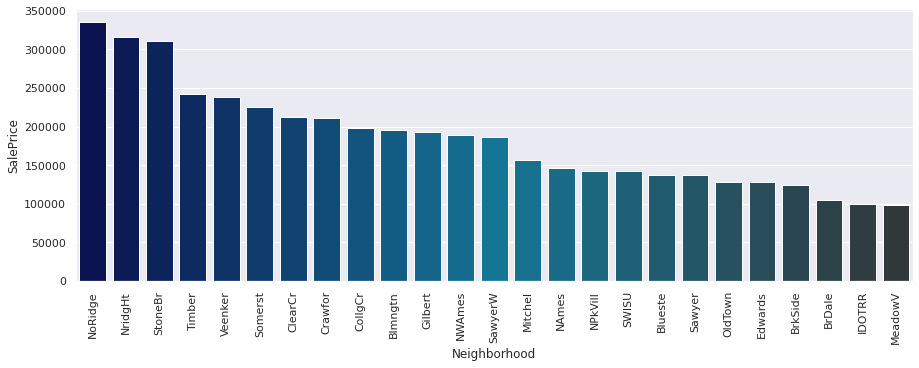

In [8]:
neigh = data.groupby(["Neighborhood"])[["SalePrice"]].mean().reset_index()
plt.figure(figsize = (15,5))
sns.barplot(neigh["Neighborhood"], neigh["SalePrice"], 
            order = neigh.sort_values("SalePrice", ascending = False).Neighborhood,
            palette = "ocean_d")
plt.xticks(rotation = 90)
plt.show()

In [9]:
pd.crosstab(data["YrSold"], data["Neighborhood"]).T

YrSold,2006,2007,2008,2009,2010
Neighborhood,,,,,
Blmngtn,7,2,2,5,1
Blueste,0,0,1,1,0
BrDale,4,3,4,4,1
BrkSide,15,10,14,17,2
ClearCr,6,6,8,4,4
CollgCr,32,30,36,39,13
Crawfor,11,19,9,9,3
Edwards,19,17,26,27,11
Gilbert,24,19,10,20,6


In [10]:
data.groupby(["Neighborhood", "OverallQual", "OverallCond"])[["SalePrice"]].mean()

SalePrice
Neighborhood OverallQual OverallCond               
Blmngtn      7           5            188660.285714
             8           5            223853.666667
Blueste      6           6            137500.000000
BrDale       5           5            113500.000000
                         6            125000.000000
...                                             ...
Veenker      6           7            187000.000000
                         8            181500.000000
             7           7            294000.000000
             8           5            279833.333333
             9           5            385000.000000

[307 rows x 1 columns]

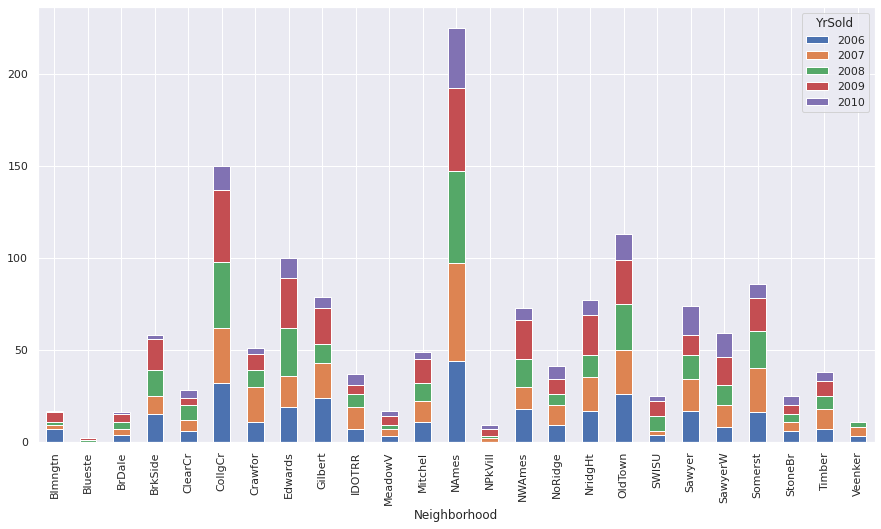

In [11]:
cross = pd.crosstab(data["YrSold"], data["Neighborhood"]).T
cross.plot(kind = "bar", stacked = True, figsize = (15,8))
plt.show()

In [12]:
data.groupby(["Neighborhood","ExterQual","ExterCond",
              "Foundation","BsmtQual","BsmtCond",
              "BsmtExposure","BsmtFinType1",
              "BsmtFinType2"])[["SalePrice"]].mean().head(60)

SalePrice
Neighborhood ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2               
Blmngtn      Gd        TA        PConc      Ex       TA       Av           Unf          Unf           183350.500000
                                            Gd       Gd       Av           GLQ          Unf           264561.000000
                                                              No           GLQ          Unf           191000.000000
                                                     TA       Av           GLQ          Unf           202106.000000
                                                                           Unf          Unf           159895.000000
                                                              Gd           GLQ          Unf           213490.000000
                                                                           Unf          Unf           224500.000000
                                                              No           ALQ          Unf           175900.000000
                                                                           GLQ          Unf           177733.333333
                                                                           Unf          Unf           176370.000000
Blueste      TA        Gd        CBlock     Gd       TA       No           LwQ          GLQ           151000.000000
                       TA        CBlock     Gd       TA       No           ALQ          Unf           124000.000000
BrDale       TA        TA        CBlock     TA       Fa       No           BLQ          Unf            83000.000000
                                                     TA       No           ALQ          Unf           106980.000000
                                                                           BLQ          Unf           110333.333333
                                                                           LwQ          Unf           125000.000000
                                                                           Rec          Unf           106000.000000
                                                                           Unf          Unf            98400.000000
BrkSide      Fa        Fa        BrkTil     TA       Fa       No           Unf          Unf            60000.000000
                       TA        CBlock     TA       TA       No           LwQ          Unf            82500.000000
             Gd        Gd        BrkTil     TA       TA       No           Unf          Unf           205000.000000
                       TA        BrkTil     TA       TA       No           Unf          Unf           134900.000000
                                 CBlock     TA       TA       No           Unf          Unf            52000.000000
                                 PConc      TA       TA       No           Unf          Unf           119000.000000
             TA        Fa        BrkTil     TA       TA       No           BLQ          Unf           144000.000000
                                                                           Unf          Unf           141500.000000
                                 CBlock     TA       TA       No           Unf          Unf           132500.000000
                       Gd        BrkTil     Gd       TA       No           Unf          Unf           167500.000000
                                            TA       Gd       Mn           Rec          ALQ           130000.000000
                                                              No           ALQ          Unf           131000.000000
                                 CBlock     TA       TA       Gd           BLQ          Unf           116500.000000
                                                              No           ALQ          Unf           159000.000000
                                 PConc      Fa       TA       Mn           Unf          Unf            79900.000000
                                            TA

In [13]:
data.groupby(["OverallQual","OverallCond"])[["SalePrice"]].mean()

SalePrice
OverallQual OverallCond               
1           1             61000.000000
            3             39300.000000
2           3             47655.500000
            5             60000.000000
3           2             80750.000000
            3             69166.666667
            4             91816.666667
            5            117300.000000
            6             69760.000000
            7            120000.000000
            8            126175.000000
4           2             87000.000000
            3            115800.000000
            4             98434.550000
            5            111019.318182
            6            111987.833333
            7            105949.842105
            8            105750.000000
            9            145000.000000
5           2             67000.000000
            3             90571.428571
            4            133219.047619
            5            132507.457746
            6            137568.846154
            7            132282.584270
            8            141889.655172
            9            124750.000000
6           3            132687.333333
            4            132716.666667
            5            162388.677778
            6            154659.036145
            7            177115.893939
            8            151996.666667
            9            176966.666667
7           3            197000.000000
            4            172166.666667
            5            208027.761134
            6            205423.321429
            7            213999.086957
            8            195368.750000
            9            214266.666667
8           4            235000.000000
            5            273155.878378
            6            301585.714286
            7            271714.285714
            8            315800.000000
            9            282933.333333
9           2            394432.000000
            5            366872.095238
10          5            422639.400000
            6            755000.000000
            9            400000.000000

In [14]:
data.groupby(["Neighborhood","MSZoning", "LandContour", "Street", "LotFrontage", "Condition1", "Condition2", "Utilities"])[["SalePrice"]].mean()

SalePrice
Neighborhood MSZoning LandContour Street LotFrontage Condition1 Condition2 Utilities               
Blmngtn      RL       Lvl         Pave   43.0        Norm       Norm       AllPub     182165.625000
                                         51.0        Norm       Norm       AllPub     175900.000000
                                         53.0        Norm       Norm       AllPub     210368.000000
Blueste      RM       Lvl         Pave   24.0        Norm       Norm       AllPub     137500.000000
BrDale       RM       Lvl         Pave   21.0        Norm       Norm       AllPub     101415.384615
...                                                                                             ...
Veenker      RL       Lvl         Pave   30.0        Norm       Norm       AllPub     270000.000000
                                         32.0        Norm       Norm       AllPub     324000.000000
                                         38.0        Norm       Norm       AllPub     245500.000000
                                         80.0        Feedr      Norm       AllPub     184250.000000
                                         90.0        Norm       Norm       AllPub     218000.000000

[640 rows x 1 columns]

In [15]:
data.groupby(["YearBuilt","YrSold"])[["SalePrice"]].mean()

SalePrice
YearBuilt YrSold               
1872      2008    122000.000000
1875      2010     94000.000000
1880      2006    124000.000000
          2007    117500.000000
          2008    295000.000000
...                         ...
2008      2009    375745.846154
          2010    295450.000000
2009      2009    252351.100000
          2010    290306.125000
2010      2010    394432.000000

[426 rows x 1 columns]

In [16]:
df = data[["YearBuilt","YrSold","SalePrice"]]
df["YrDiff"] = df["YrSold"] - df["YearBuilt"]
df.groupby(["YearBuilt", "YrSold", "YrDiff"])[["SalePrice"]].mean()

SalePrice
YearBuilt YrSold YrDiff               
1872      2008   136     122000.000000
1875      2010   135      94000.000000
1880      2006   126     124000.000000
          2007   127     117500.000000
          2008   128     295000.000000
...                                ...
2008      2009   1       375745.846154
          2010   2       295450.000000
2009      2009   0       252351.100000
          2010   1       290306.125000
2010      2010   0       394432.000000

[426 rows x 1 columns]

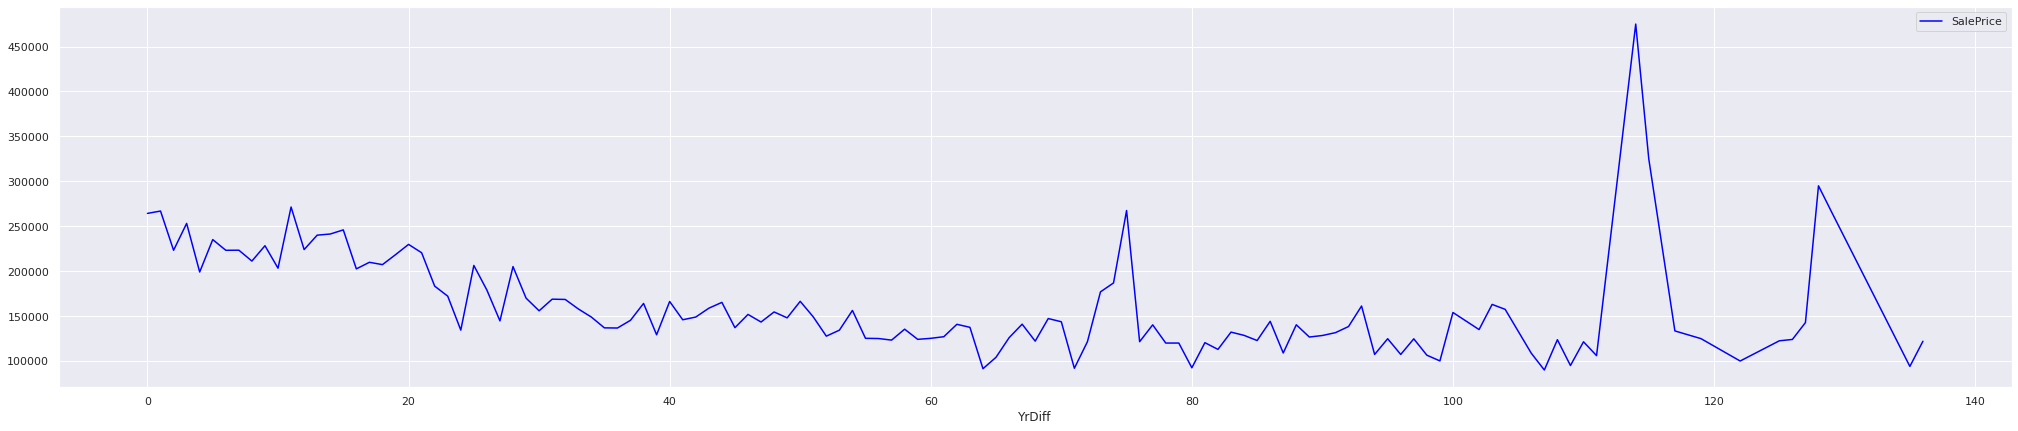

In [17]:
df.groupby(["YrDiff"])[["SalePrice"]].mean().plot(kind = "line", color = "blue", figsize = (35,7))
plt.show()

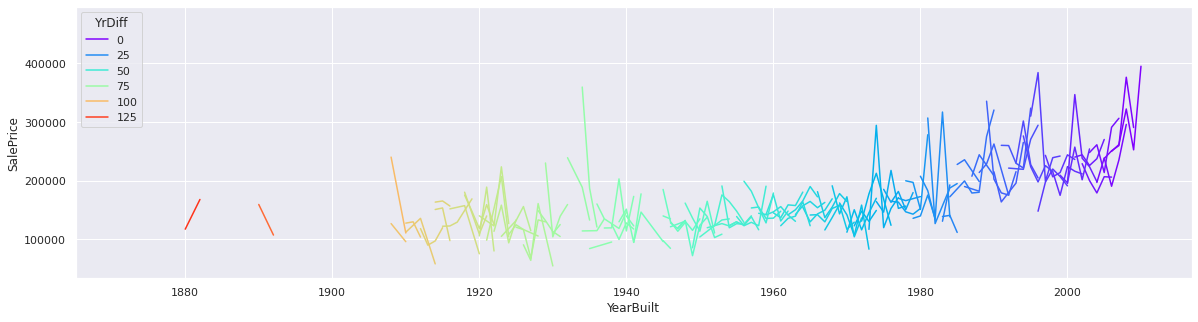

In [18]:
df2 = df.groupby(["YearBuilt","YrDiff"])[["SalePrice"]].mean().reset_index()

plt.figure(figsize = (20,5))
sns.lineplot(data = df2, x = "YearBuilt", y = "SalePrice", hue = "YrDiff", palette = "rainbow")
plt.show()

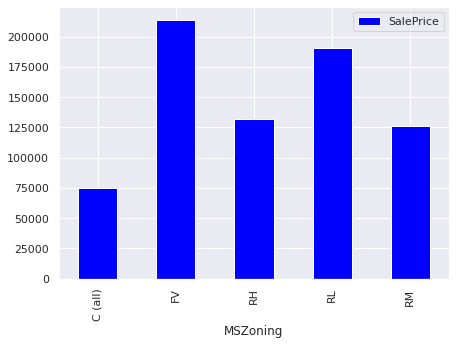

In [19]:
data.groupby("MSZoning")[["SalePrice"]].mean().plot(kind = "bar", color = "blue", figsize = (7,5))
plt.show()

In [20]:
df3 = pd.DataFrame()
df3 = df3.append(((data.isnull().sum()/len(data))*100).to_frame()).rename(columns = {0:"Null Percentage"})
df3["Total_null_count"] = data.isnull().sum()
df3["Total_count"] = len(data)
df3

,Null Percentage,Total_null_count,Total_count
Id,0.000000,0,1460
MSSubClass,0.000000,0,1460
MSZoning,0.000000,0,1460
LotFrontage,17.739726,259,1460
LotArea,0.000000,0,1460
...,...,...,...
MoSold,0.000000,0,1460
YrSold,0.000000,0,1460
SaleType,0.000000,0,1460
SaleCondition,0.000000,0,1460


In [21]:
df3[(df3["Null Percentage"] > 0)&(df3["Null Percentage"] <= 10)]

,Null Percentage,Total_null_count,Total_count
MasVnrType,0.547945,8,1460
MasVnrArea,0.547945,8,1460
BsmtQual,2.534247,37,1460
BsmtCond,2.534247,37,1460
BsmtExposure,2.602740,38,1460
BsmtFinType1,2.534247,37,1460
BsmtFinType2,2.602740,38,1460
Electrical,0.068493,1,1460
GarageType,5.547945,81,1460
GarageYrBlt,5.547945,81,1460


In [22]:
data[data.isnull().any(True)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,...,228,0,0,0,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,IR2,Lvl,AllPub,Inside,...,0,0,176,0,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,IR1,Lvl,AllPub,Corner,...,176,0,0,0,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,700,3,2010,WD,Normal,149000
17,18,90,RL,72.0,10791,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,500,10,2006,WD,Normal,90000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,1444,30,RL,NaN,8854,Pave,Reg,Lvl,AllPub,Inside,...,0,0,40,0,0,5,2009,WD,Normal,121000
1446,1447,20,RL,NaN,26142,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,4,2010,WD,Normal,157900
1449,1450,180,RM,21.0,1533,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2006,WD,Abnorml,92000
1450,1451,90,RL,60.0,9000,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,9,2009,WD,Normal,136000


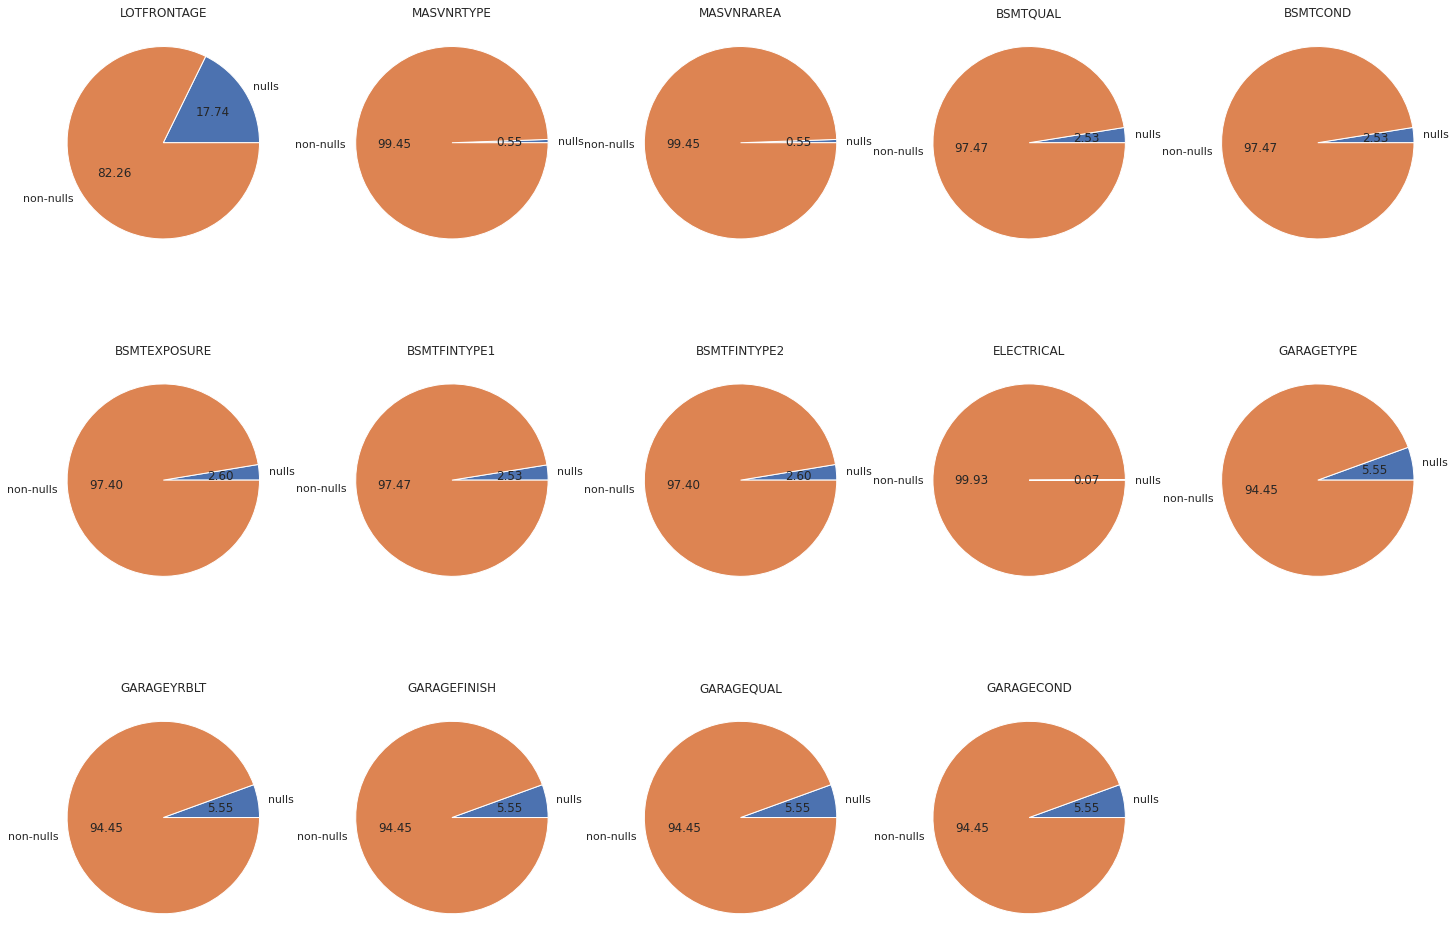

In [23]:
indx = df3[df3["Null Percentage"]>0].index
total_rows = data.shape[0]

a,b,c = 5,5,1
fig = plt.figure(figsize = (25,30))
for i in indx:
    plt.subplot(a,b,c)
    value1 = data[i].isnull().sum()
    value2 = total_rows - value1
    plt.pie(x = [value1, value2], labels = ["nulls", "non-nulls"],
            radius = 1,autopct = "%.2f")
    plt.title(i.upper())
    c = c+1
plt.show()
    

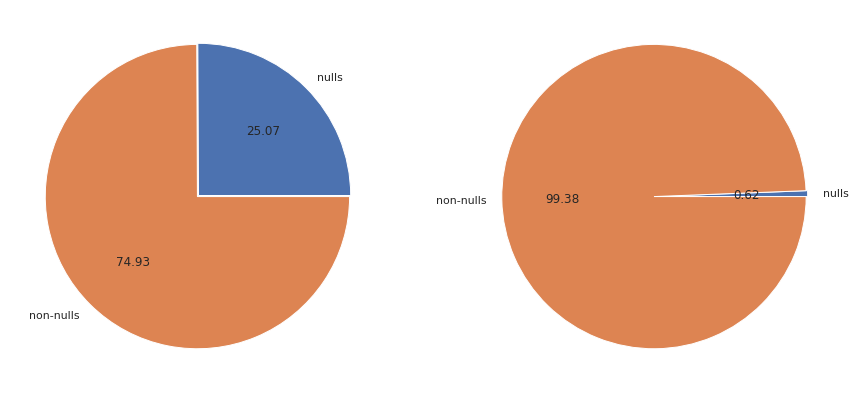

In [24]:
v1 = data[data.isnull().any(True)].shape[0]
v2 = data.shape[0] - v1

plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
plt.pie(x = [v1, v2], labels = ["nulls", "non-nulls"],
       radius = 1, explode = [0.01,0],
       autopct = "%.2f")

plt.subplot(1,2,2)
v1 = data[data[["Electrical","MasVnrArea","MasVnrType"]].isnull().any(True)].shape[0]
v2 = data.shape[0] - v1
plt.pie(x = [v1, v2], labels = ["nulls", "non-nulls"],
       radius = 1, explode = [0.01,0],
       autopct = "%.2f")

plt.show()

## **NULL VALUES LOG**

In [25]:
nulls = df3[df3["Null Percentage"]>0]
column_names = df3[df3["Null Percentage"]>0].index
nulls["datatype"] = data[column_names].dtypes
nulls

,Null Percentage,Total_null_count,Total_count,datatype
LotFrontage,17.739726,259,1460,float64
MasVnrType,0.547945,8,1460,object
MasVnrArea,0.547945,8,1460,float64
BsmtQual,2.534247,37,1460,object
BsmtCond,2.534247,37,1460,object
BsmtExposure,2.602740,38,1460,object
BsmtFinType1,2.534247,37,1460,object
BsmtFinType2,2.602740,38,1460,object
Electrical,0.068493,1,1460,object
GarageType,5.547945,81,1460,object


### **NULL HANDLING ON NUMERICAL COLUMNS**

In [26]:
nulls[nulls["datatype"] == "float"]

,Null Percentage,Total_null_count,Total_count,datatype
LotFrontage,17.739726,259,1460,float64
MasVnrArea,0.547945,8,1460,float64
GarageYrBlt,5.547945,81,1460,float64


In [27]:
data[nulls[nulls["datatype"] == "float"].index].skew()

LotFrontage    2.163569
MasVnrArea     2.669084
GarageYrBlt   -0.649415
dtype: float64

In [28]:
def find_similar_features(feature):
    correlation = dict()
    for i in data.select_dtypes("number").columns:
        if i!=feature:
            correlation.update({i:data[feature].corr(data[i])})
    keys, values = list(correlation.keys()), list(correlation.values())
    max_value = max(values)
    for i,j in correlation.items():
        if j == max_value:
            print(f"{feature} has high correlation with a feature {i} : {j}")
            
find_similar_features("GarageYrBlt")

GarageYrBlt has high correlation with a feature YearBuilt : 0.8256674841743421


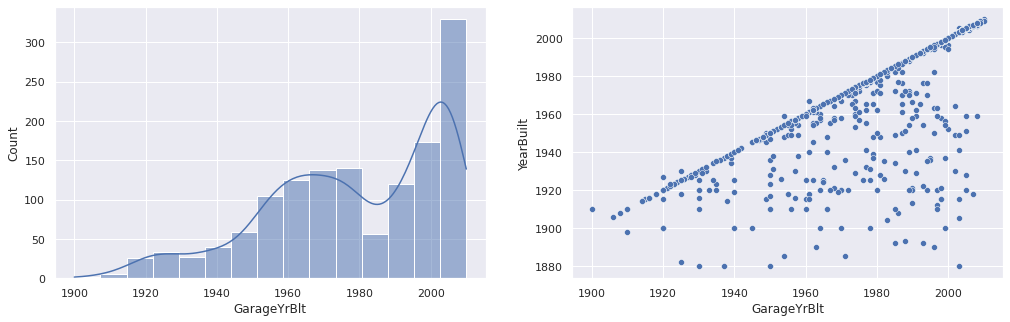

In [29]:
plt.figure(figsize = (17,5))
plt.subplot(1,2,1)
sns.histplot(data["GarageYrBlt"], kde=True)

plt.subplot(1,2,2)
sns.scatterplot(data["GarageYrBlt"], data["YearBuilt"])
plt.show()

In [30]:
print(data[data[["GarageYrBlt","YearBuilt"]].isnull().any(True)][["GarageYrBlt","YearBuilt"]].shape[0])
print(data[data[["GarageYrBlt","YearBuilt"]].isnull().any(True)][["GarageYrBlt","YearBuilt"]]["GarageYrBlt"].isnull().sum())

81
81


In [31]:
'''

    Both the features "GarageYrBlt" and "YearBuilt" has the same characteristics and represents the same thing in the dataframe.
    
    Hence, one of them has to be dropped. Since, "GarageYrBlt" had more number of null values in it, I dropped it by retaining
    
    the feature with lower null percentage "YearBuilt".

'''

data.drop("GarageYrBlt", axis = 1, inplace = True)

In [32]:
find_similar_features("MasVnrArea")

MasVnrArea has high correlation with a feature SalePrice : 0.4774930470957163


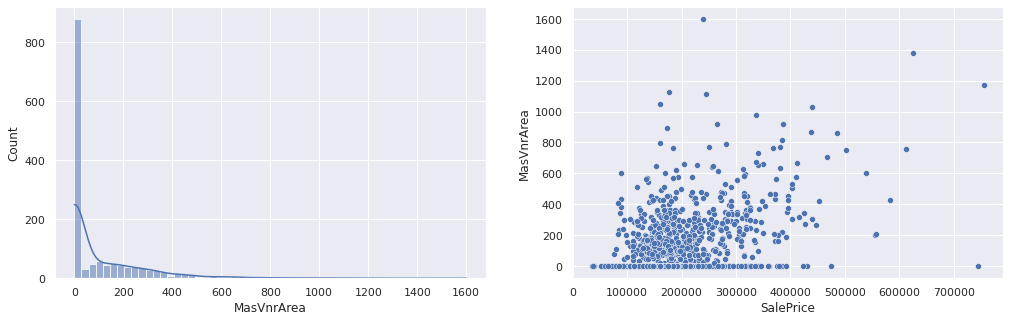

In [33]:
plt.figure(figsize = (17,5))
plt.subplot(1,2,1)
sns.histplot(data["MasVnrArea"], kde=True)

data_df = data.groupby(["MasVnrType"])["MasVnrArea"].mean().reset_index()

plt.subplot(1,2,2)
#sns.barplot(data_df["MasVnrType"],data_df["MasVnrArea"])
sns.scatterplot(data["SalePrice"],data["MasVnrArea"])
plt.show()

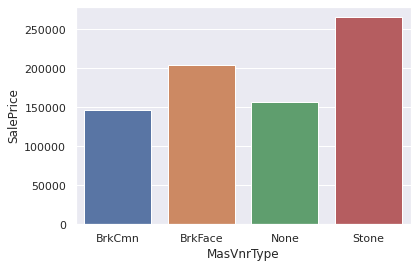

In [34]:
data_df = data.groupby(["MasVnrType"])["SalePrice"].mean().reset_index()

sns.barplot(data_df["MasVnrType"],data_df["SalePrice"])

plt.show()

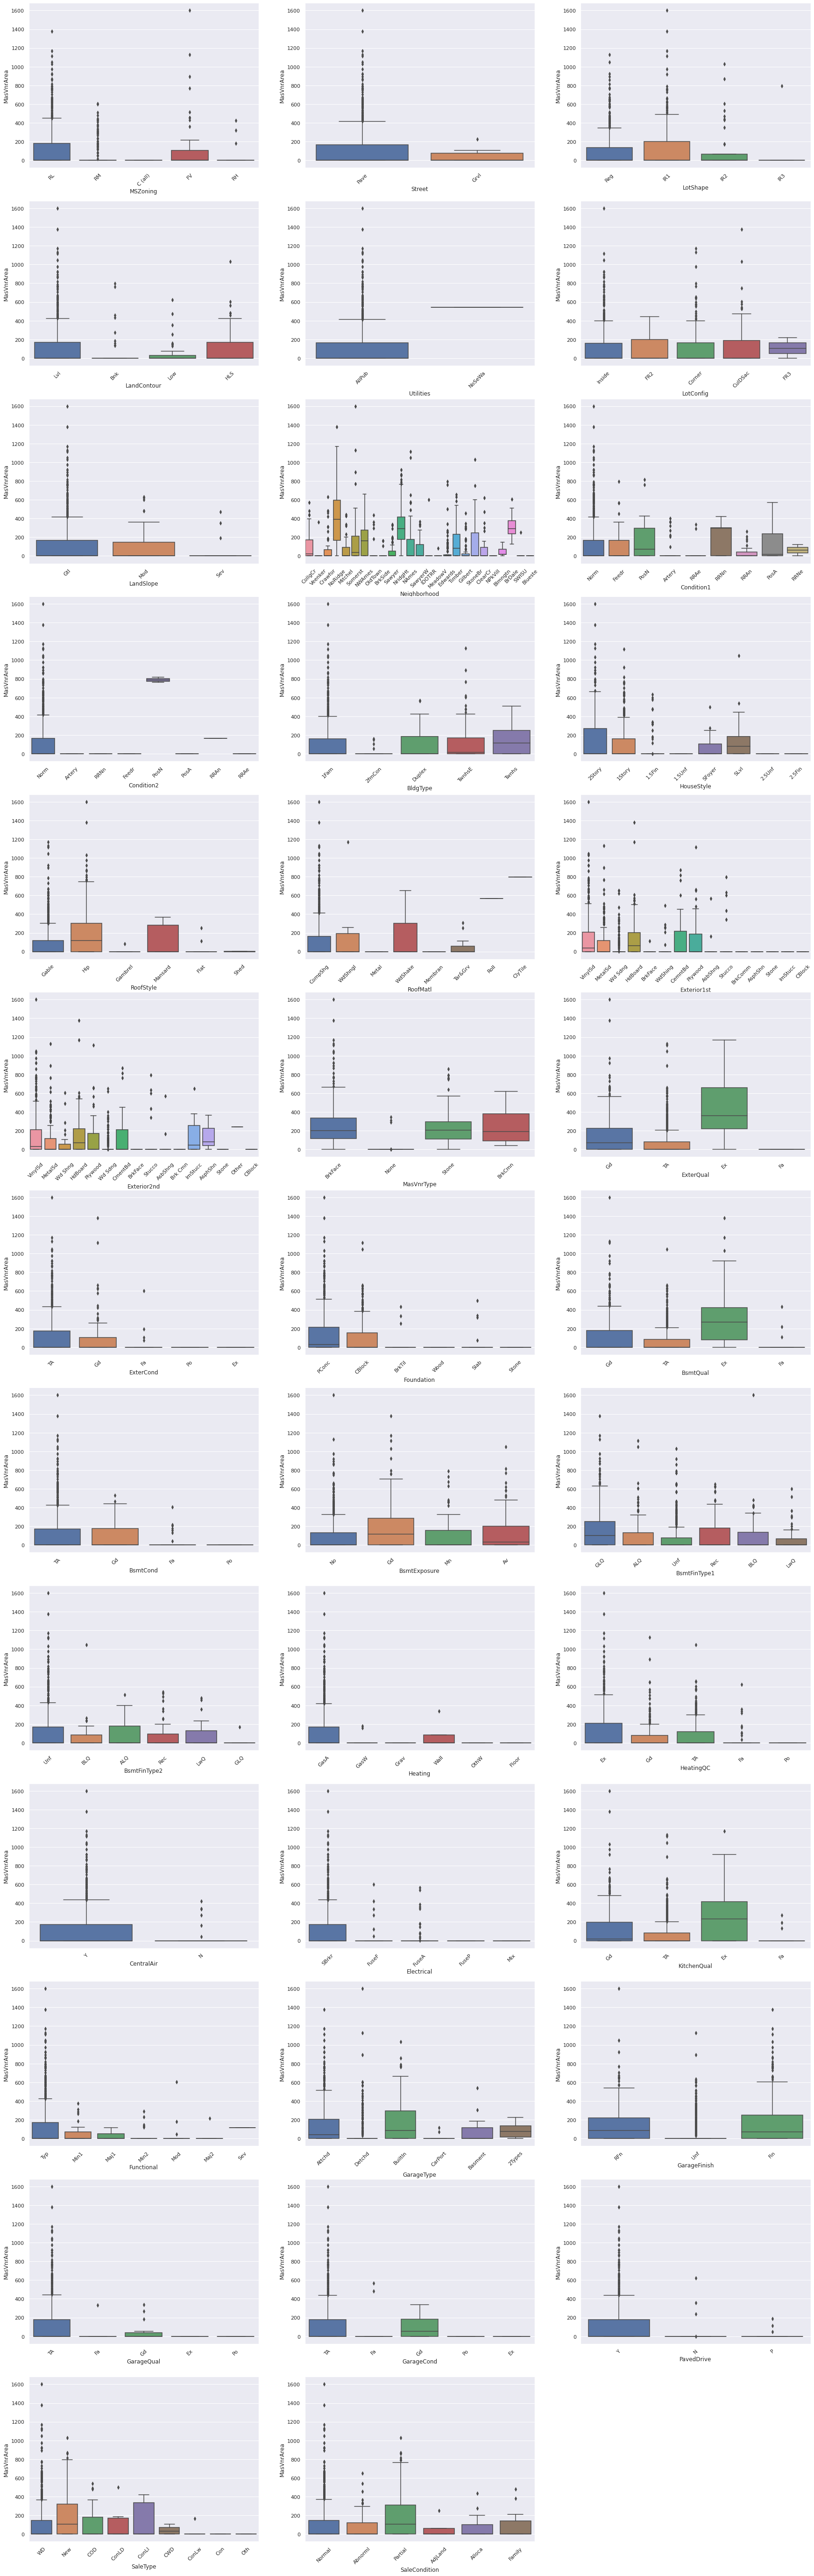

In [35]:
a,b,c = 13,3,1
plt.figure(figsize = (30,100))
for i in data.select_dtypes("object").columns:
    plt.subplot(a,b,c)
    sns.boxplot(data[i], data["MasVnrArea"])
    plt.xticks(rotation = 45)
    c = c+1
plt.show()
    

In [36]:
from sklearn.impute import KNNImputer

knn_imputed = pd.DataFrame(KNNImputer().fit_transform(data[data.drop("Id", axis = 1).select_dtypes("number").columns]))
knn_imputed.columns = data.drop("Id", axis = 1).select_dtypes("number").columns
data[knn_imputed.columns] = knn_imputed
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60.0,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,WD,Normal,208500.0
1,2,20.0,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,...,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,WD,Normal,181500.0
2,3,60.0,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,WD,Normal,223500.0
3,4,70.0,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,...,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,5,60.0,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,...,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60.0,RL,62.0,7917.0,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,WD,Normal,175000.0
1456,1457,20.0,RL,85.0,13175.0,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,WD,Normal,210000.0
1457,1458,70.0,RL,66.0,9042.0,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,WD,Normal,266500.0
1458,1459,20.0,RL,68.0,9717.0,Pave,Reg,Lvl,AllPub,Inside,...,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,WD,Normal,142125.0


### **NULL HANDLING ON CATEGORICAL COLUMNS**

In [37]:
nulls_object = nulls[nulls["datatype"] == "object"]
nulls_object

,Null Percentage,Total_null_count,Total_count,datatype
MasVnrType,0.547945,8,1460,object
BsmtQual,2.534247,37,1460,object
BsmtCond,2.534247,37,1460,object
BsmtExposure,2.602740,38,1460,object
BsmtFinType1,2.534247,37,1460,object
BsmtFinType2,2.602740,38,1460,object
Electrical,0.068493,1,1460,object
GarageType,5.547945,81,1460,object
GarageFinish,5.547945,81,1460,object
GarageQual,5.547945,81,1460,object


In [38]:
null_cat = data[data[nulls_object.index].isnull().any(True)][nulls_object.index]
null_cat[:60]

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond
17,None,NaN,NaN,NaN,NaN,NaN,SBrkr,CarPort,Unf,TA,TA
39,None,NaN,NaN,NaN,NaN,NaN,FuseP,NaN,NaN,NaN,NaN
48,None,TA,TA,No,Unf,Unf,SBrkr,NaN,NaN,NaN,NaN
78,None,TA,TA,No,Unf,Unf,SBrkr,NaN,NaN,NaN,NaN
88,None,TA,Fa,No,Unf,Unf,SBrkr,NaN,NaN,NaN,NaN
89,None,Gd,TA,No,GLQ,Unf,SBrkr,NaN,NaN,NaN,NaN
90,None,NaN,NaN,NaN,NaN,NaN,FuseA,Detchd,Unf,TA,TA
99,None,TA,TA,No,ALQ,Unf,SBrkr,NaN,NaN,NaN,NaN
102,None,NaN,NaN,NaN,NaN,NaN,SBrkr,Attchd,Unf,TA,TA
108,None,TA,TA,No,Unf,Unf,FuseF,NaN,NaN,NaN,NaN


In [39]:
null_cat[60:120]

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond
710,None,TA,TA,No,Unf,Unf,SBrkr,NaN,NaN,NaN,NaN
736,None,NaN,NaN,NaN,NaN,NaN,FuseF,Detchd,Unf,TA,TA
738,None,Gd,Gd,Gd,GLQ,Unf,SBrkr,NaN,NaN,NaN,NaN
749,None,NaN,NaN,NaN,NaN,NaN,FuseF,Detchd,Unf,TA,TA
750,None,TA,Fa,No,Unf,Unf,SBrkr,NaN,NaN,NaN,NaN
778,BrkFace,NaN,NaN,NaN,NaN,NaN,SBrkr,Detchd,Unf,TA,TA
784,None,TA,TA,No,Unf,Unf,SBrkr,NaN,NaN,NaN,NaN
826,None,TA,TA,No,ALQ,Unf,SBrkr,NaN,NaN,NaN,NaN
843,None,TA,TA,No,Unf,Unf,SBrkr,NaN,NaN,NaN,NaN
868,None,NaN,NaN,NaN,NaN,NaN,SBrkr,Attchd,Unf,TA,TA


In [40]:
null_cat[-2:]

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond
1450,None,Gd,TA,No,Unf,Unf,SBrkr,NaN,NaN,NaN,NaN
1453,None,Gd,TA,No,Unf,Unf,SBrkr,NaN,NaN,NaN,NaN


In [41]:
(data[data[nulls_object.index].isnull().any(True)].shape[0]/data.shape[0])*100

8.356164383561644

In [42]:
data.dropna(inplace = True)

In [43]:
data.isnull().sum().sum()

0

In [44]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1338.0,731.228700,421.779691,1.0,366.25,730.5,1098.75,1460.0
MSSubClass,1338.0,56.136024,41.252576,20.0,20.00,50.0,70.00,190.0
LotFrontage,1338.0,71.397758,23.502809,21.0,60.00,70.0,81.35,313.0
LotArea,1338.0,10706.294469,10336.621126,1300.0,7744.00,9600.0,11760.75,215245.0
OverallQual,1338.0,6.219731,1.324472,2.0,5.00,6.0,7.00,10.0
OverallCond,1338.0,5.596413,1.078124,2.0,5.00,5.0,6.00,9.0
YearBuilt,1338.0,1973.029148,29.563540,1880.0,1956.00,1976.0,2001.00,2010.0
YearRemodAdd,1338.0,1985.668909,20.296463,1950.0,1968.00,1994.5,2004.00,2010.0
MasVnrArea,1338.0,110.360239,185.604816,0.0,0.00,0.0,174.00,1600.0
BsmtFinSF1,1338.0,464.234679,458.792420,0.0,0.00,413.0,733.00,5644.0


In [45]:
def outliers(df):
    a,b,c = 10,4,1
    plt.figure(figsize = (50,100))
    for i in df.columns:
        plt.subplot(a,b,c)
        sns.boxplot(df[i])
        plt.title(i.upper())
        c = c+1
    plt.show()

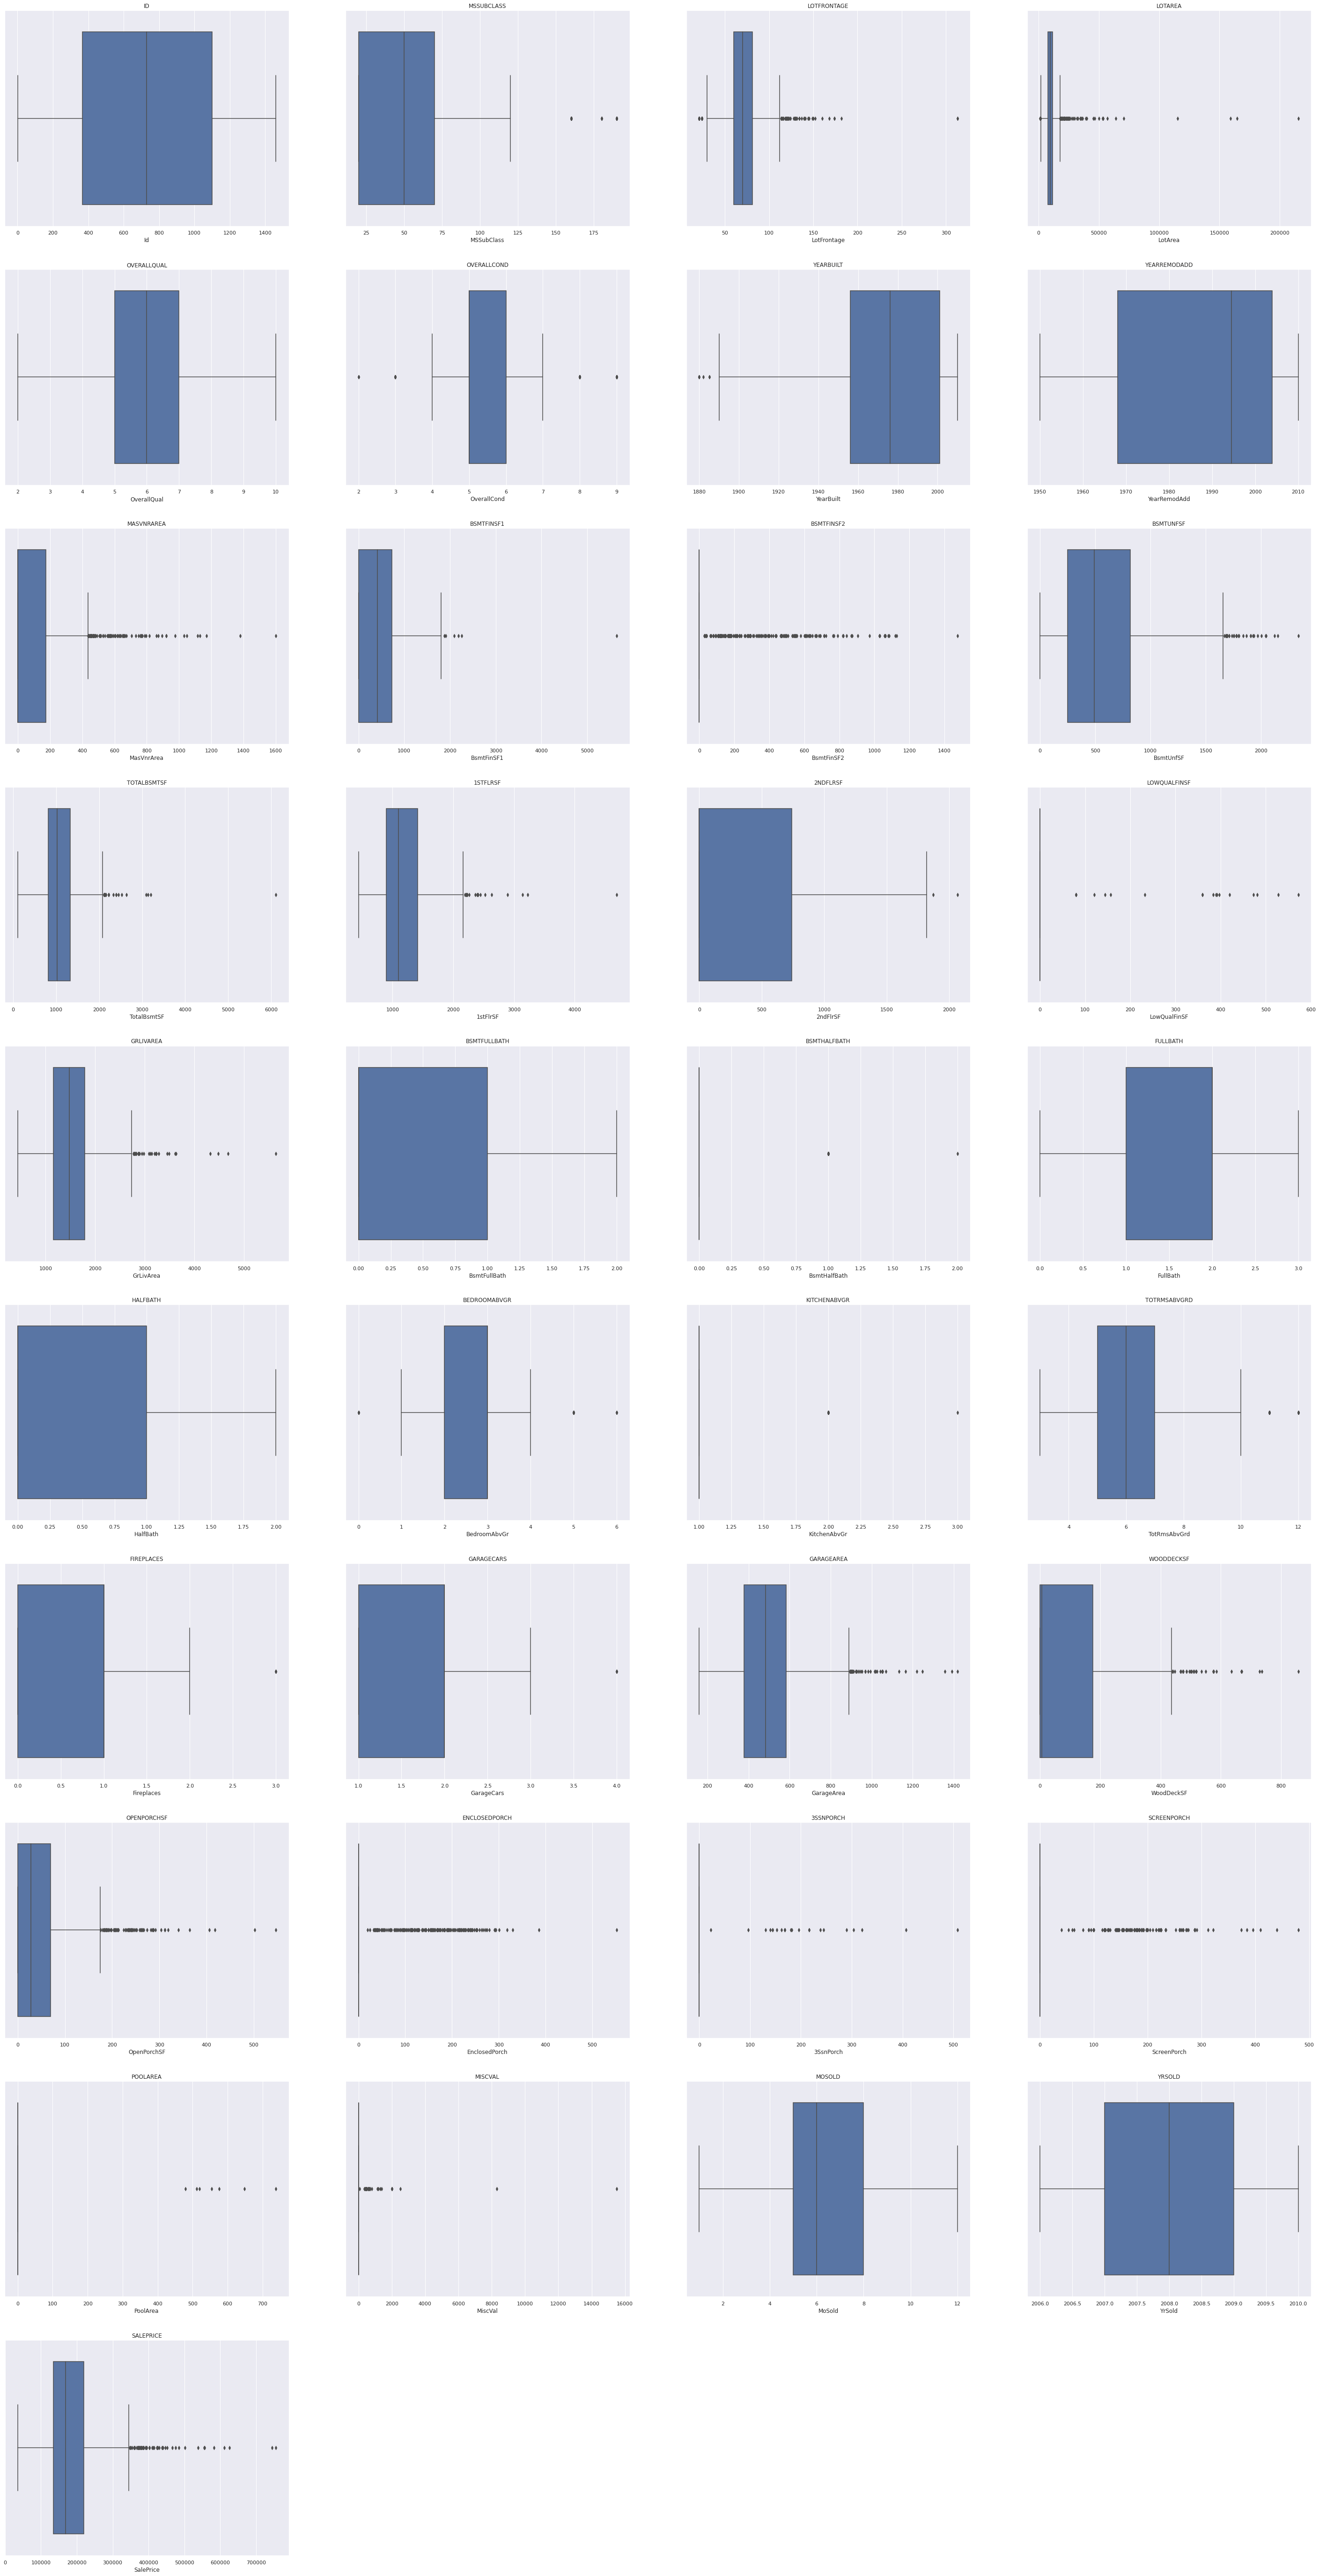

In [46]:
outliers(data.select_dtypes("number"))

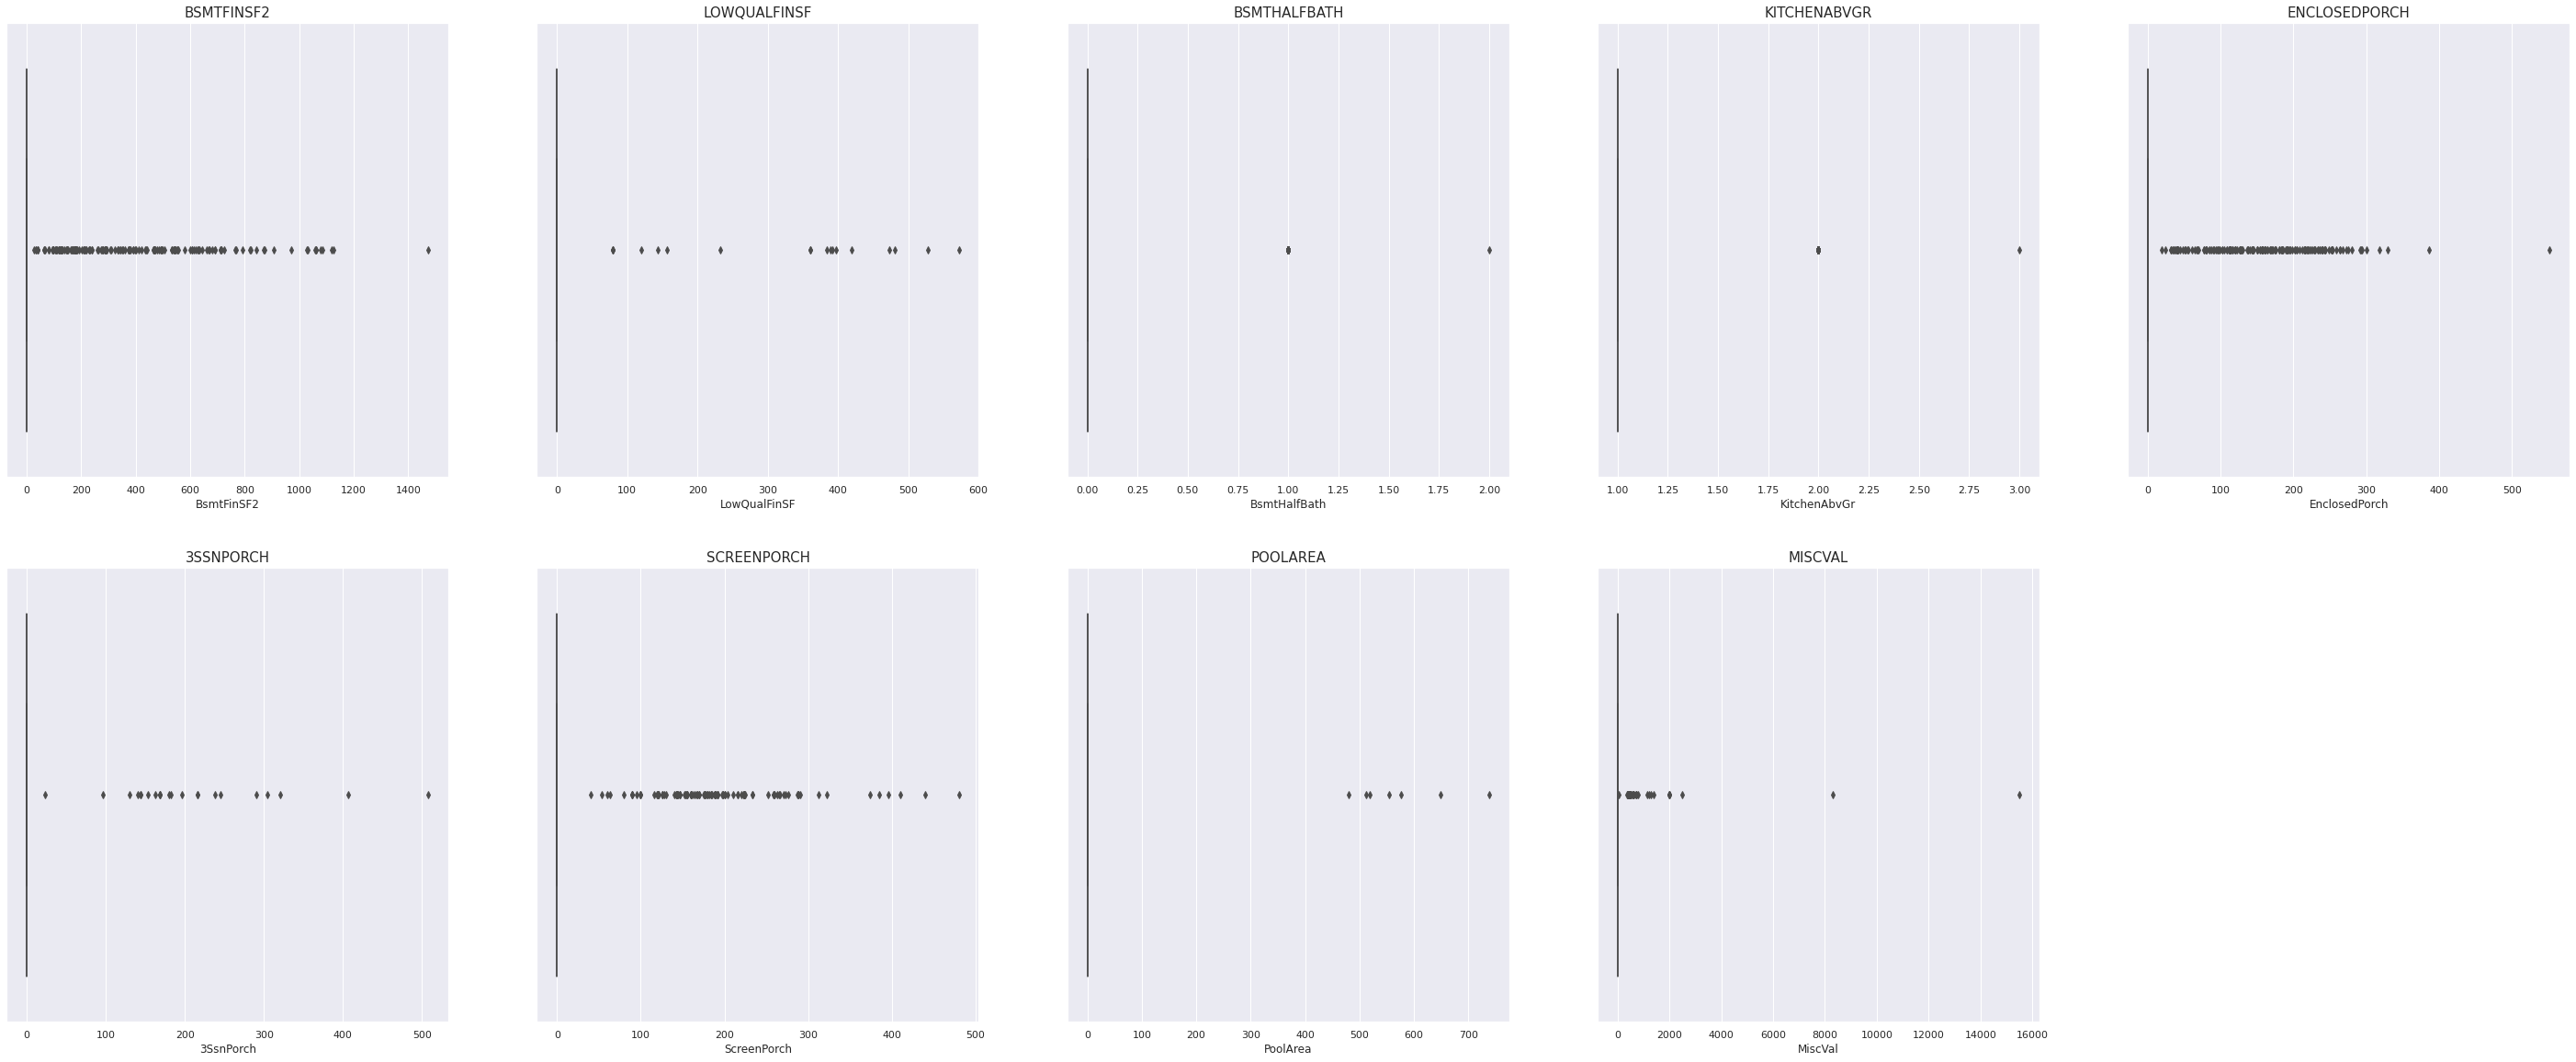

In [47]:
'''

Features with unusual outliers :

--> BsmtFinSF2: Type 2 finished square feet
--> LowQualFinSF: Low quality finished square feet (all floors)
--> BsmtHalfBath: Basement half bathrooms
--> KitchenAbvGr : -- no info
--> EnclosedPorch: Enclosed porch area in square feet
--> 3SsnPorch: Three season porch area in square feet
--> ScreenPorch: Screen porch area in square feet
--> PoolArea: Pool area in square feet
--> MiscVal: $Value of miscellaneous feature

Looking at the outliers of all of the above features, it's clear that most of the values in the data are 0. But, considering the nature of the features, there is no way 0 can be a part of those values.
Hence, I conidered all those zero's as either nulls or mistakenly entered data. Upon considering all the zeros as nulls, I've decided to drop those feratures since there is no way we can impute them considering their proportion w.r to the overall data.


below are the outliers representation of the above mentioned features.

'''

feature = ["BsmtFinSF2","LowQualFinSF","BsmtHalfBath","KitchenAbvGr",
           "EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal"]

a,b,c = 2,5,1

plt.figure(figsize = (50,20))
for i in feature:
    plt.subplot(a,b,c)
    sns.boxplot(data[i])
    plt.title(i.upper(), fontsize = 15)
    c = c+1
plt.show()

In [48]:
data.drop(feature, axis = 1, inplace = True)

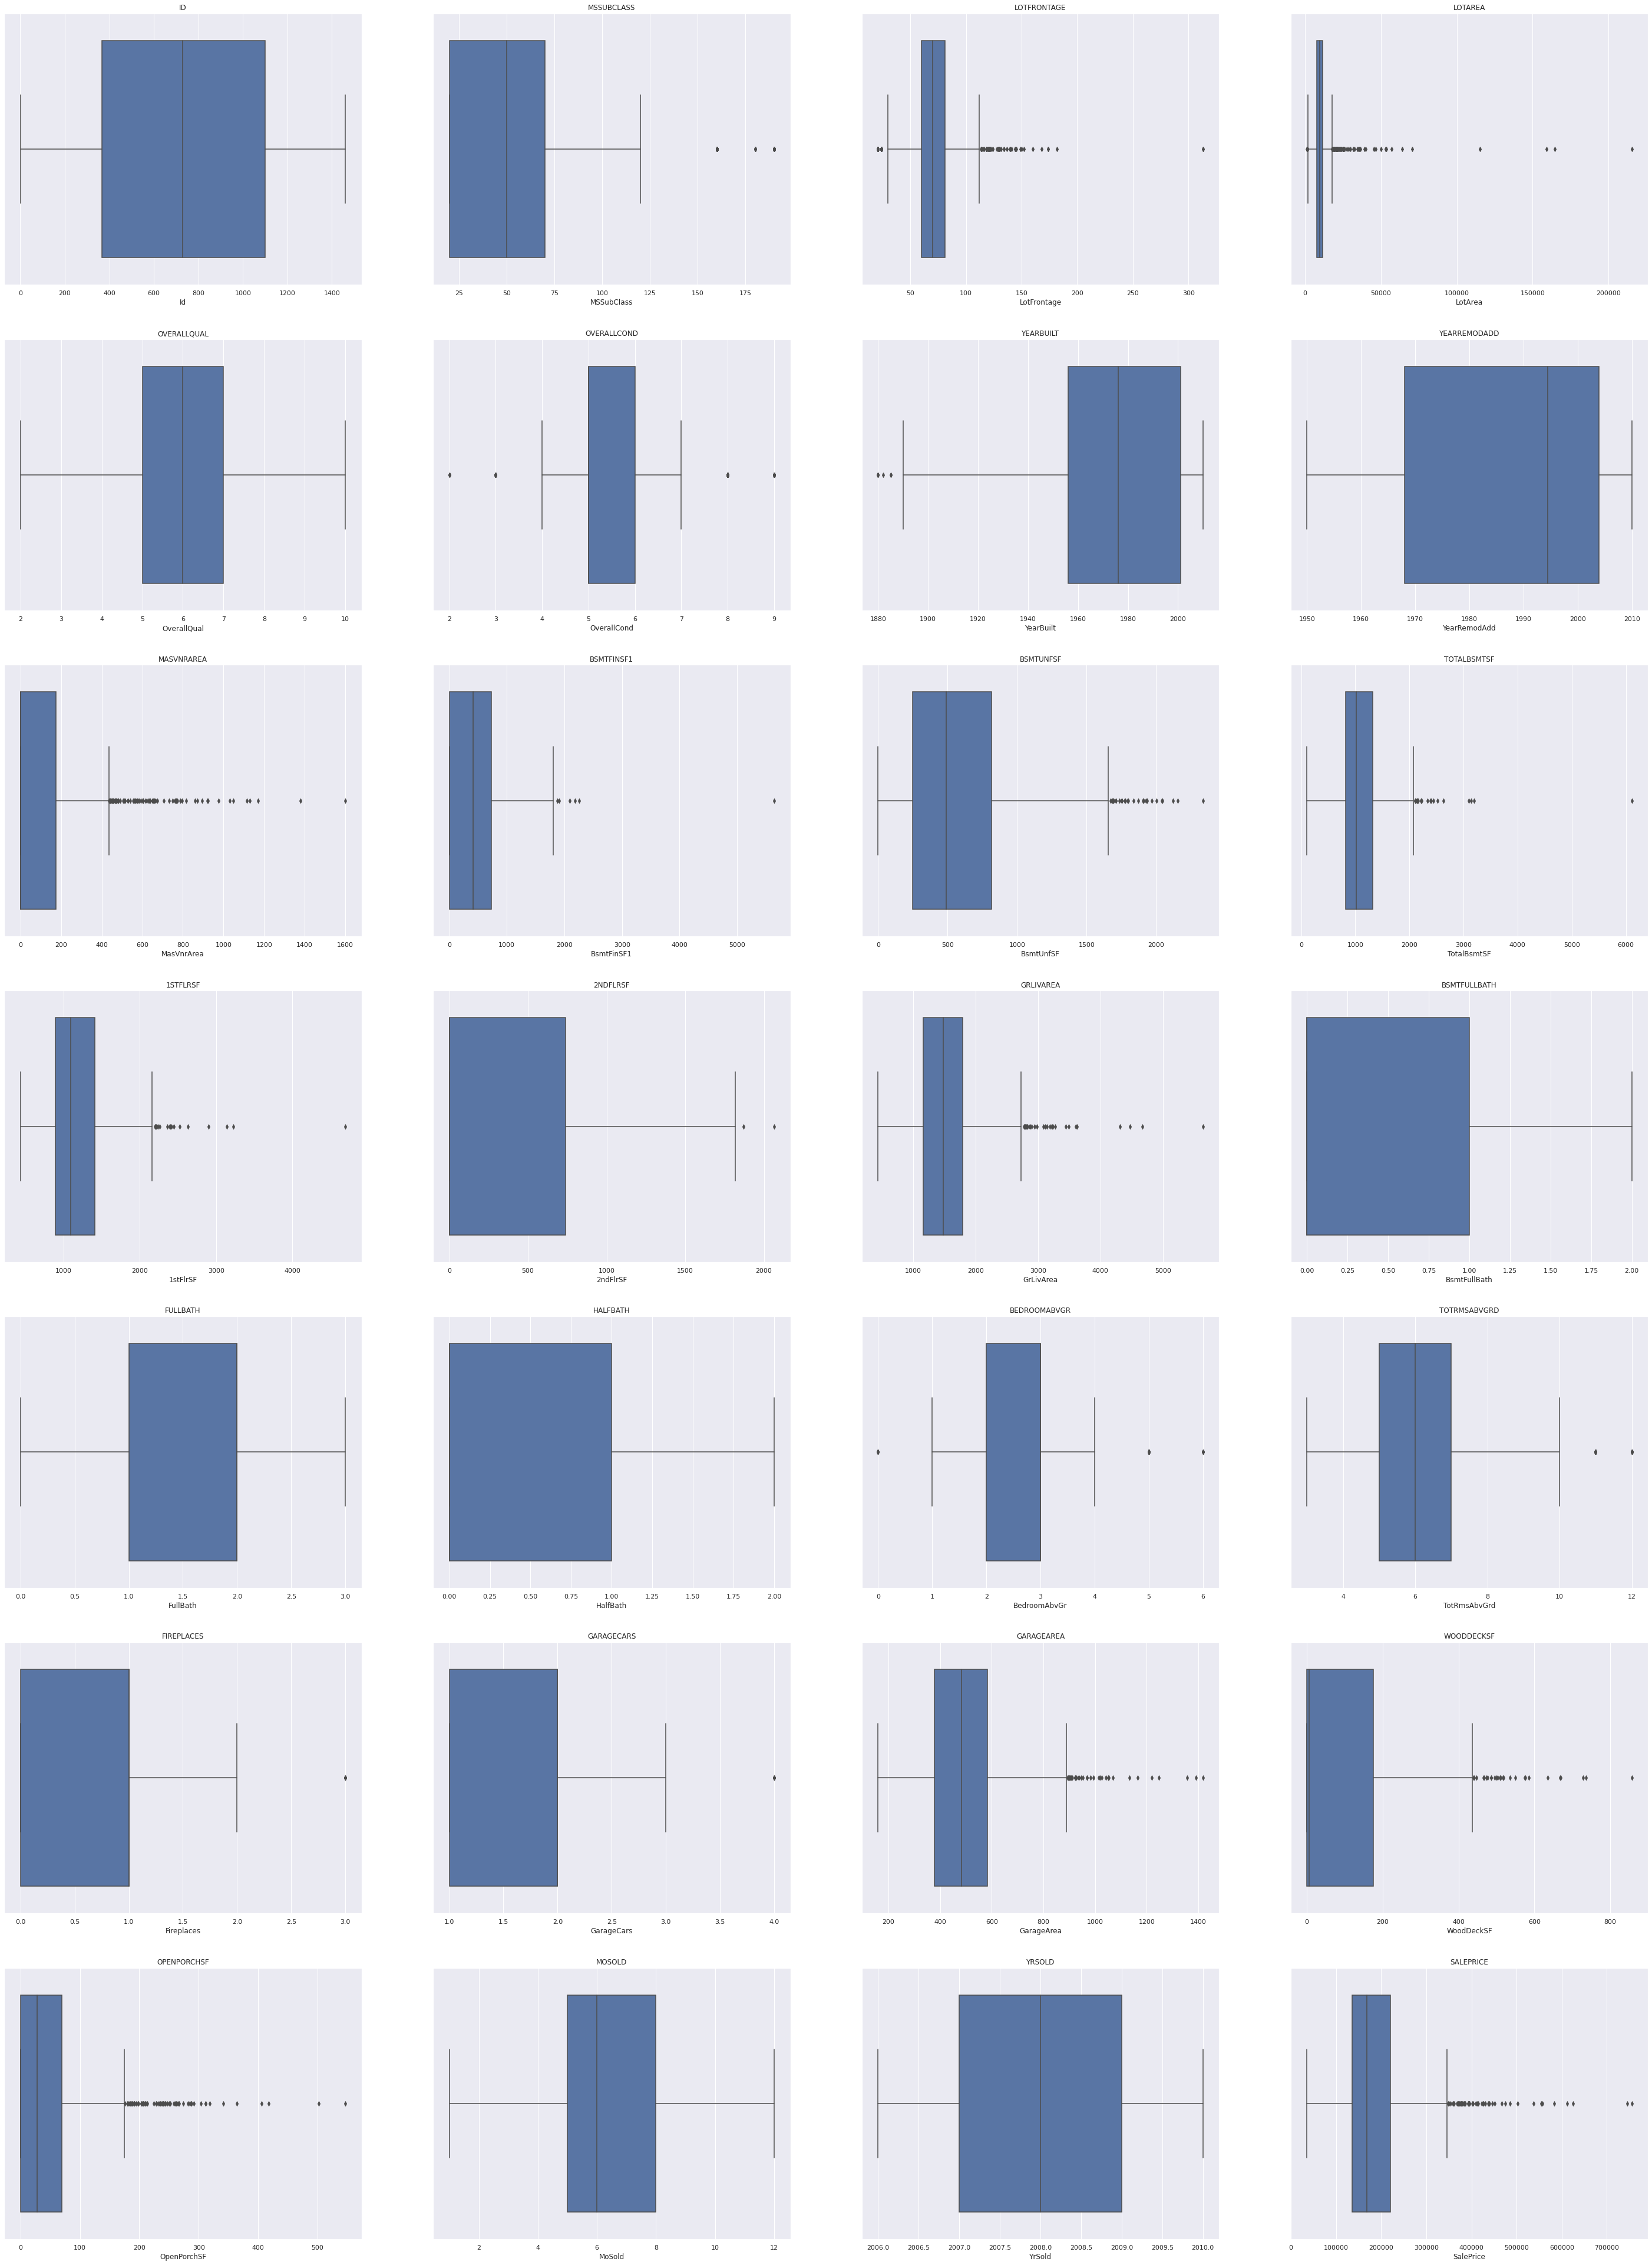

In [49]:
outliers(data.select_dtypes("number"))

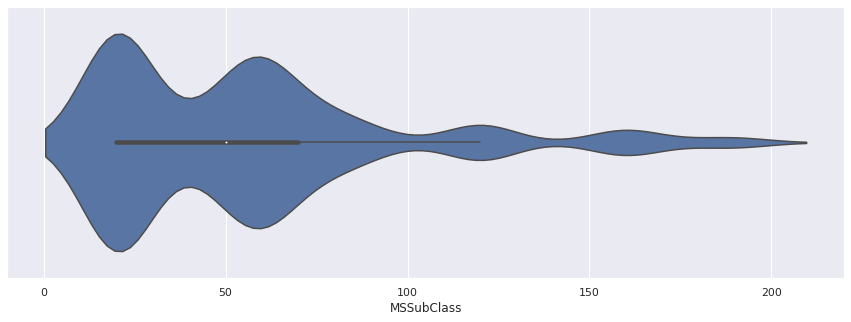

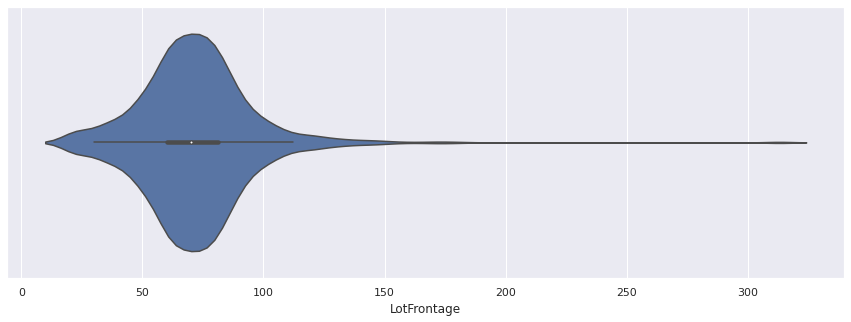

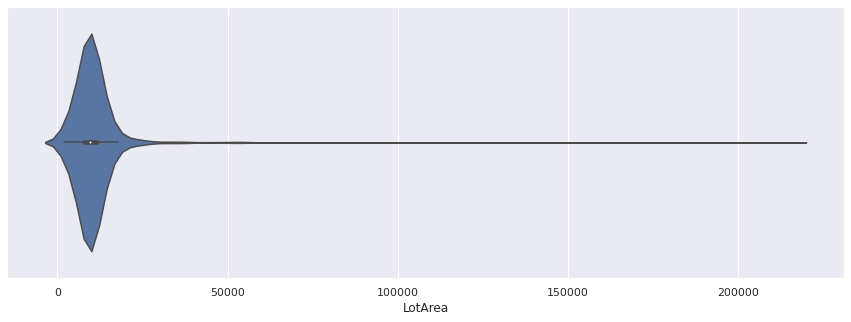

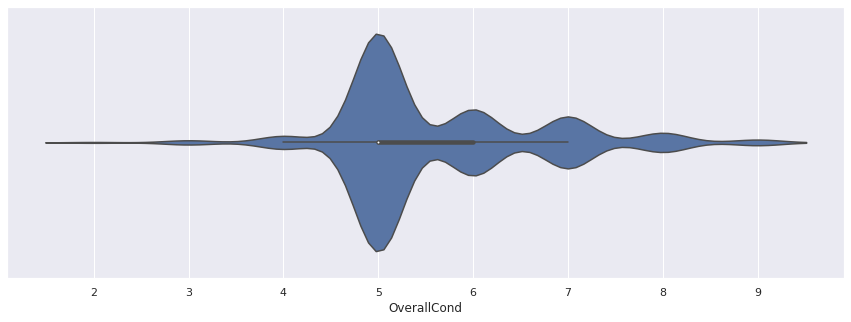

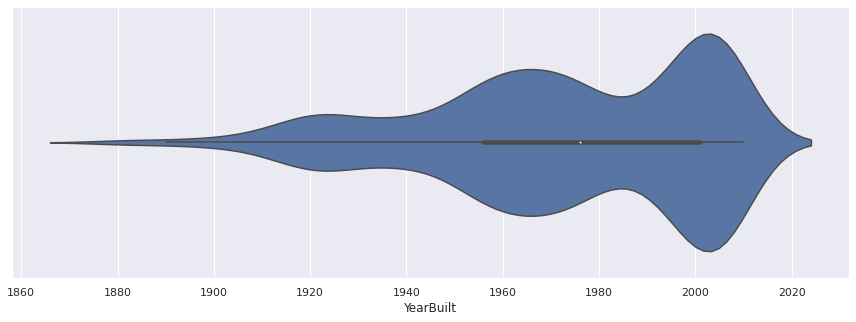

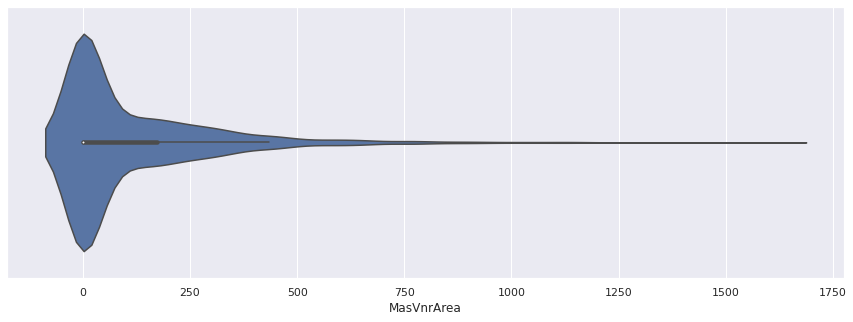

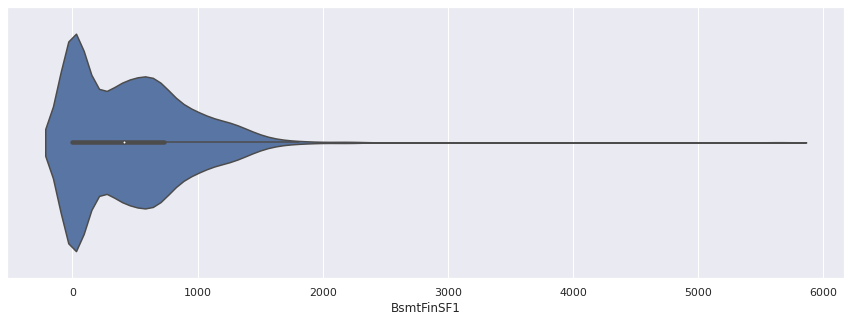

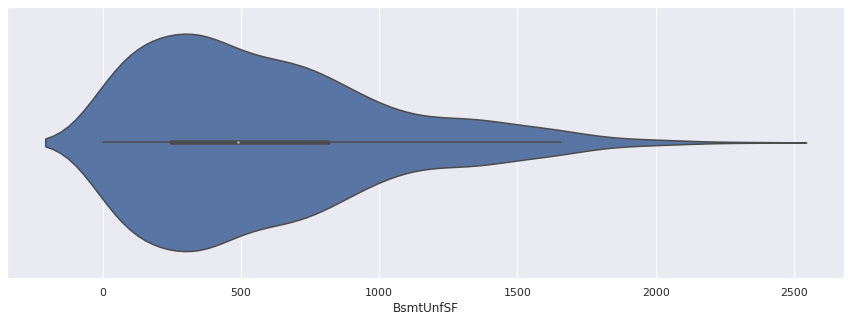

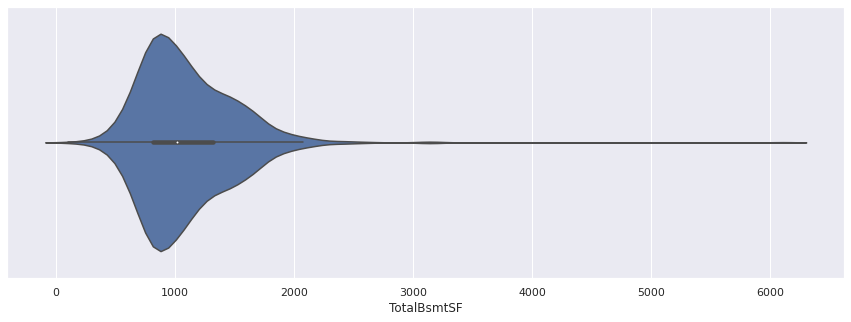

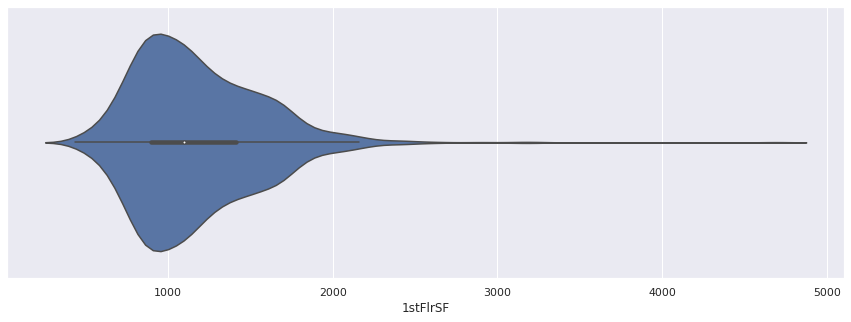

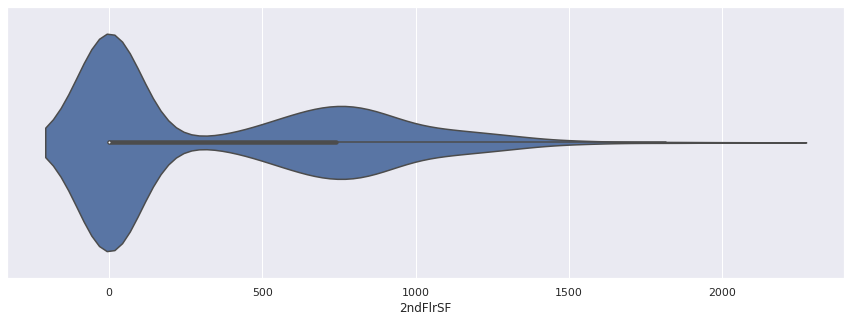

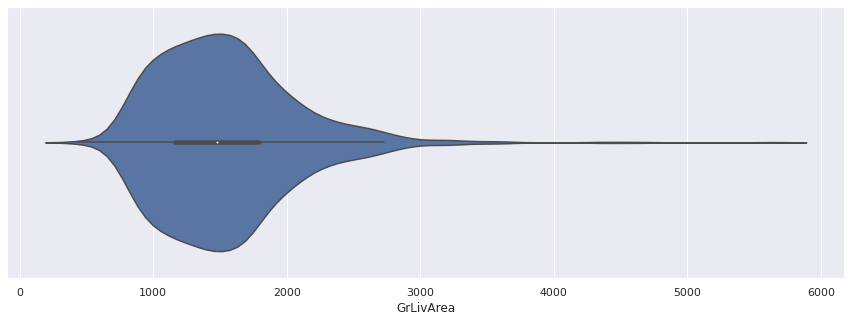

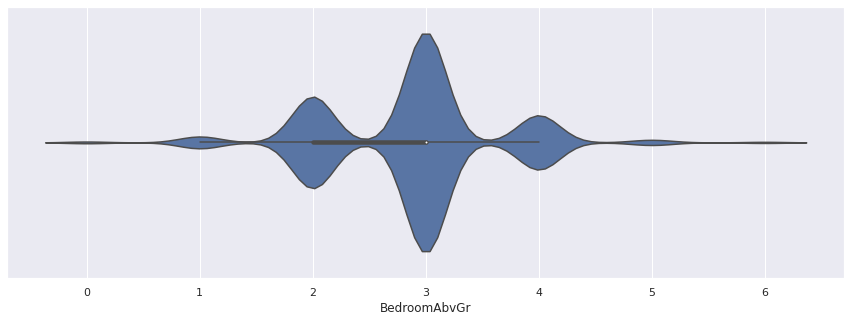

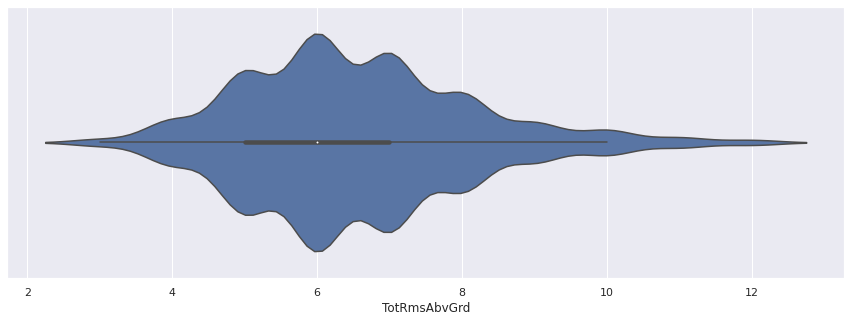

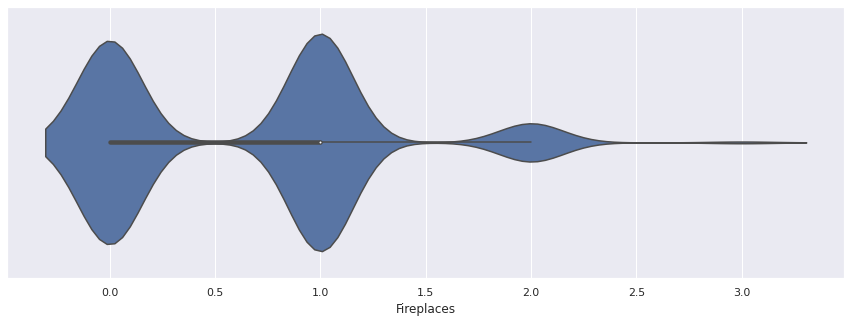

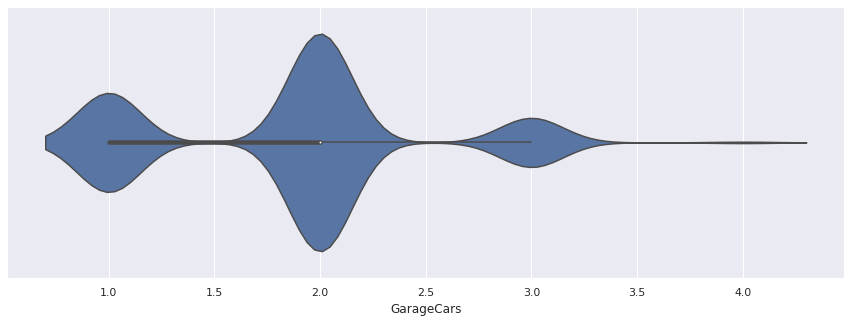

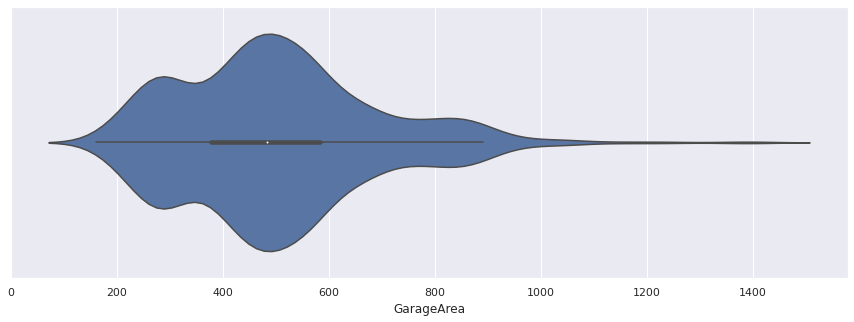

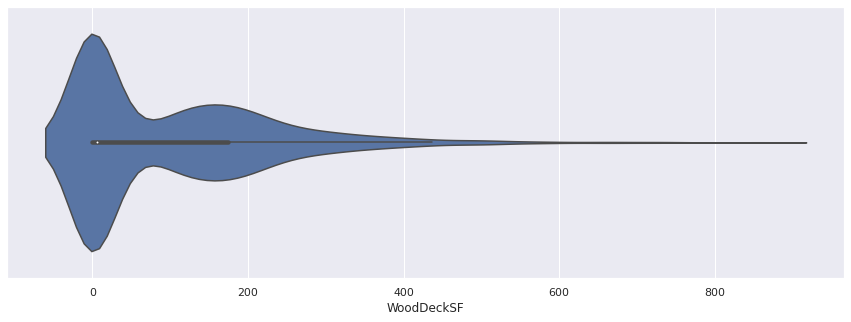

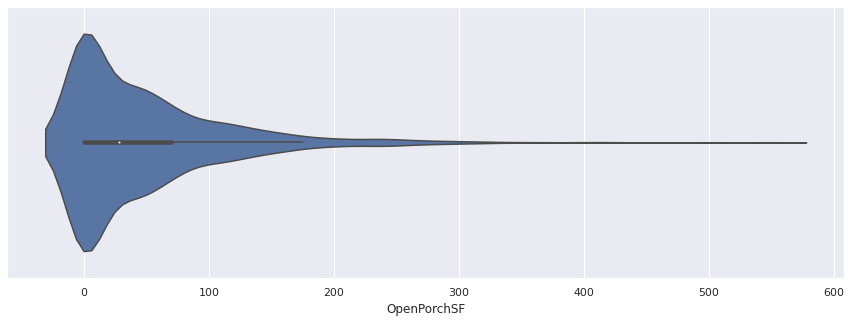

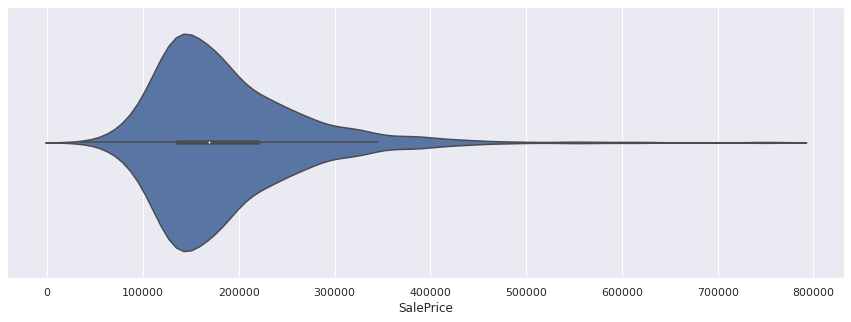

In [50]:
# -- filtering out features with outliers :

features = data.select_dtypes("number").columns
outlier_features = dict()
for i in features:
    n25, n50, n75 = np.percentile(data[i], [25,50,75])
    iqr = n75 - n25
    lb = n25 - (1.5*iqr)
    ub = n75 + (1.5*iqr)
    outliers  = len(data[(data[i]<lb)|(data[i]>ub)])
    if outliers>0:
        plt.figure(figsize = (15,5))
        sns.violinplot(data[i])
        outlier_features.update({i:outliers})
    plt.show()

In [51]:
x = pd.DataFrame(outlier_features, index = [0]).T.rename(columns = {0:"outlier"})
x["total_length"] = data.shape[0]
x.T

,MSSubClass,LotFrontage,LotArea,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
outlier,88,89,76,106,7,82,6,29,20,17,2,29,28,27,5,5,38,27,65,56
total_length,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338


In [52]:
features = data.select_dtypes("number").columns
for i in features:
    n1,n25, n50, n75, n99 = np.percentile(data[i], [1,25,50,75,99])
    iqr = n75 - n25
    lb = n25 - (1.5*iqr)
    ub = n75 + (1.5*iqr)
    outliers = len(data[(data[i]<lb)|(data[i]>ub)])
    if outliers>0:
        indx = data[(data[i]<lb)|(data[i]>ub)].index
        for j in indx:
            if j<round(data.shape[0]):
                data.loc[j,i] = data[i].mean()
            else:
                data.loc[j,i] = data[i].mean()

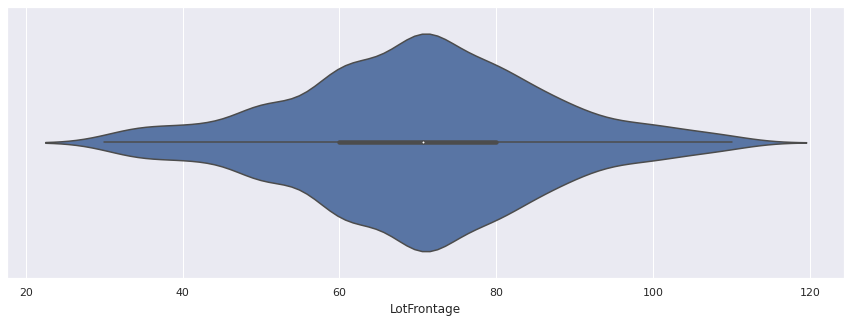

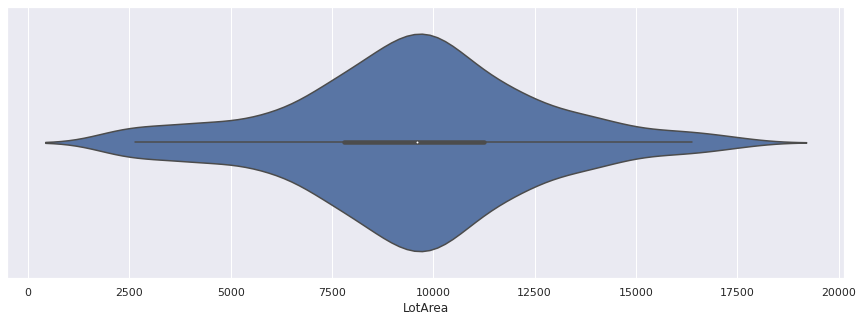

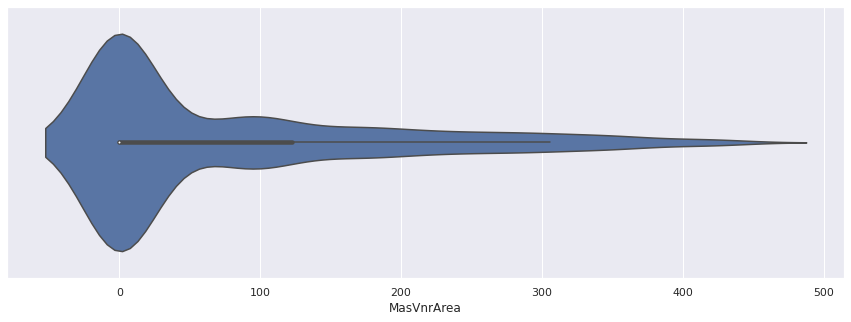

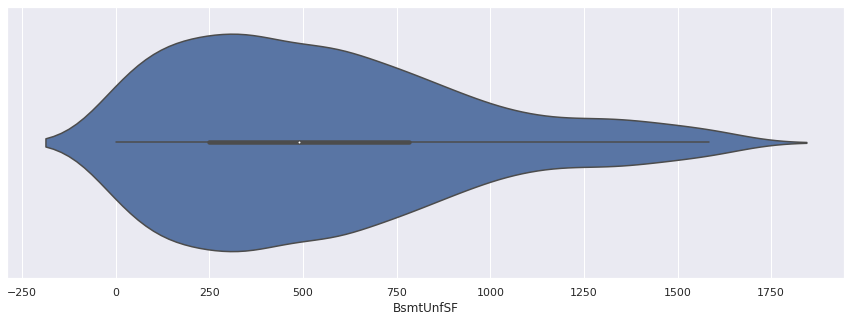

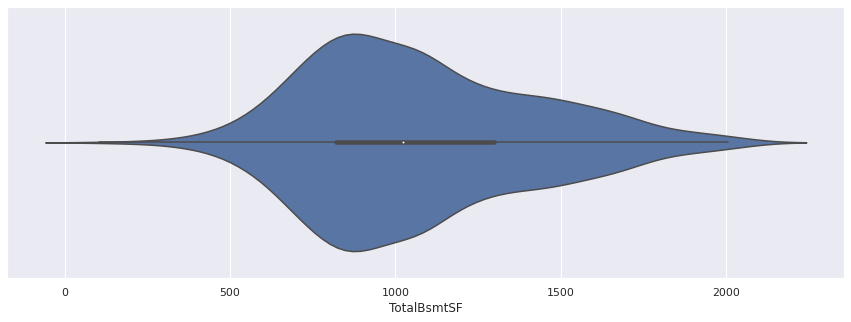

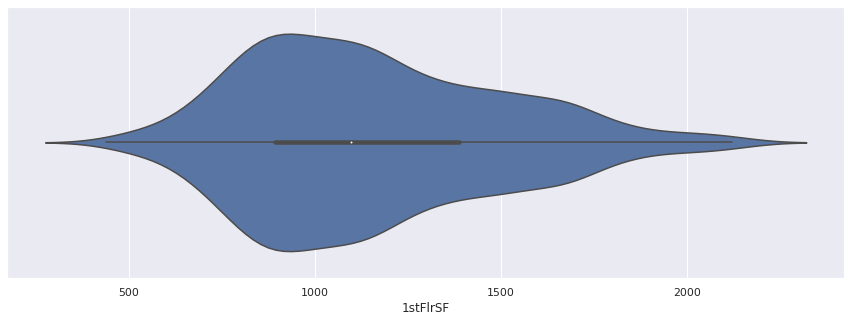

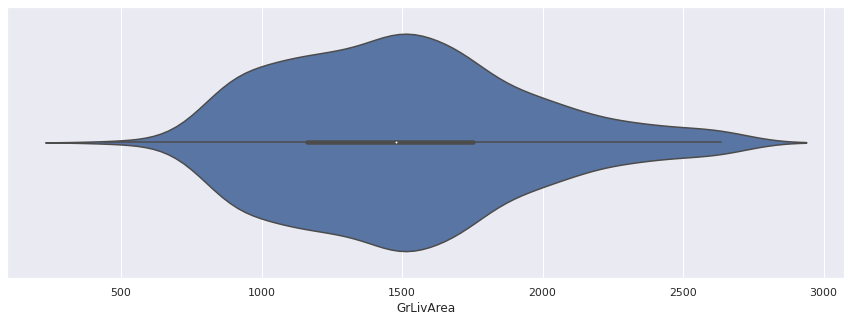

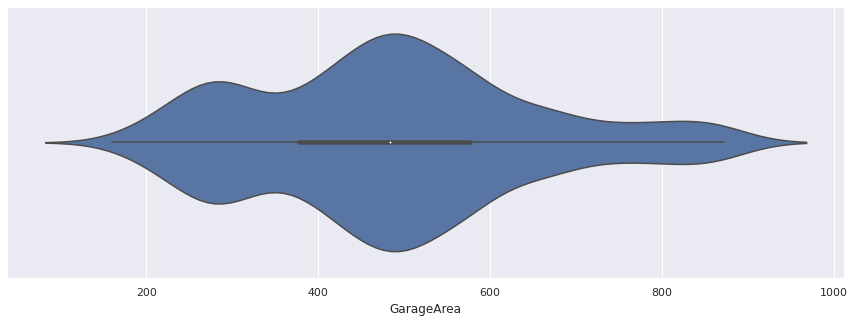

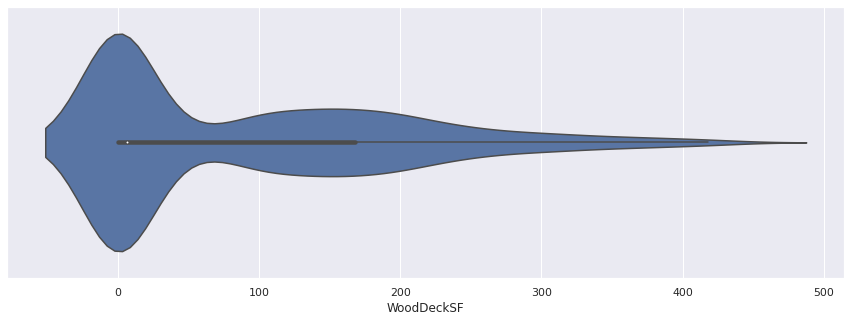

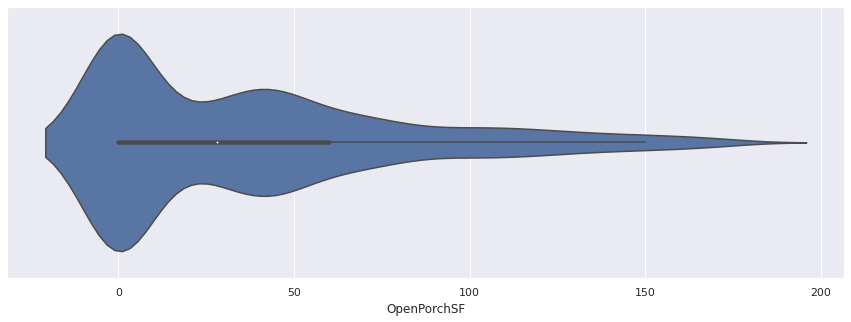

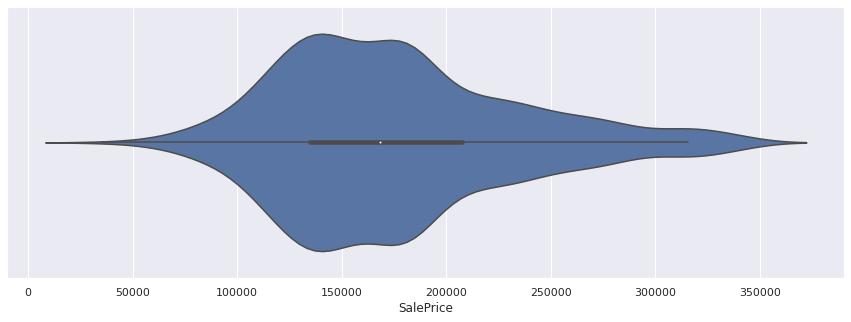

In [53]:
# -- filtering out features with outliers :

features = data.select_dtypes("number").columns
outlier_features = dict()
for i in features:
    n25, n50, n75 = np.percentile(data[i], [25,50,75])
    iqr = n75 - n25
    lb = n25 - (1.5*iqr)
    ub = n75 + (1.5*iqr)
    outliers  = len(data[(data[i]<lb)|(data[i]>ub)])
    if outliers>0:
        plt.figure(figsize = (15,5))
        sns.violinplot(data[i])
        outlier_features.update({i:outliers})
    plt.show()

In [54]:
features = ["MasVnrArea","OpenPorchSF"]
for i in features:
    n25, n50, n75 = np.percentile(data[i], [25,50,75])
    iqr = n75 - n25
    lb = n25 - (1.5*iqr)
    ub = n75 + (1.5*iqr)
    outliers = len(data[(data[i]<lb)|(data[i]>ub)])
    if outliers>0:
        indx = data[(data[i]<lb)|(data[i]>ub)].index
        for j in indx:
            data.drop(j, axis = 0, inplace = True)

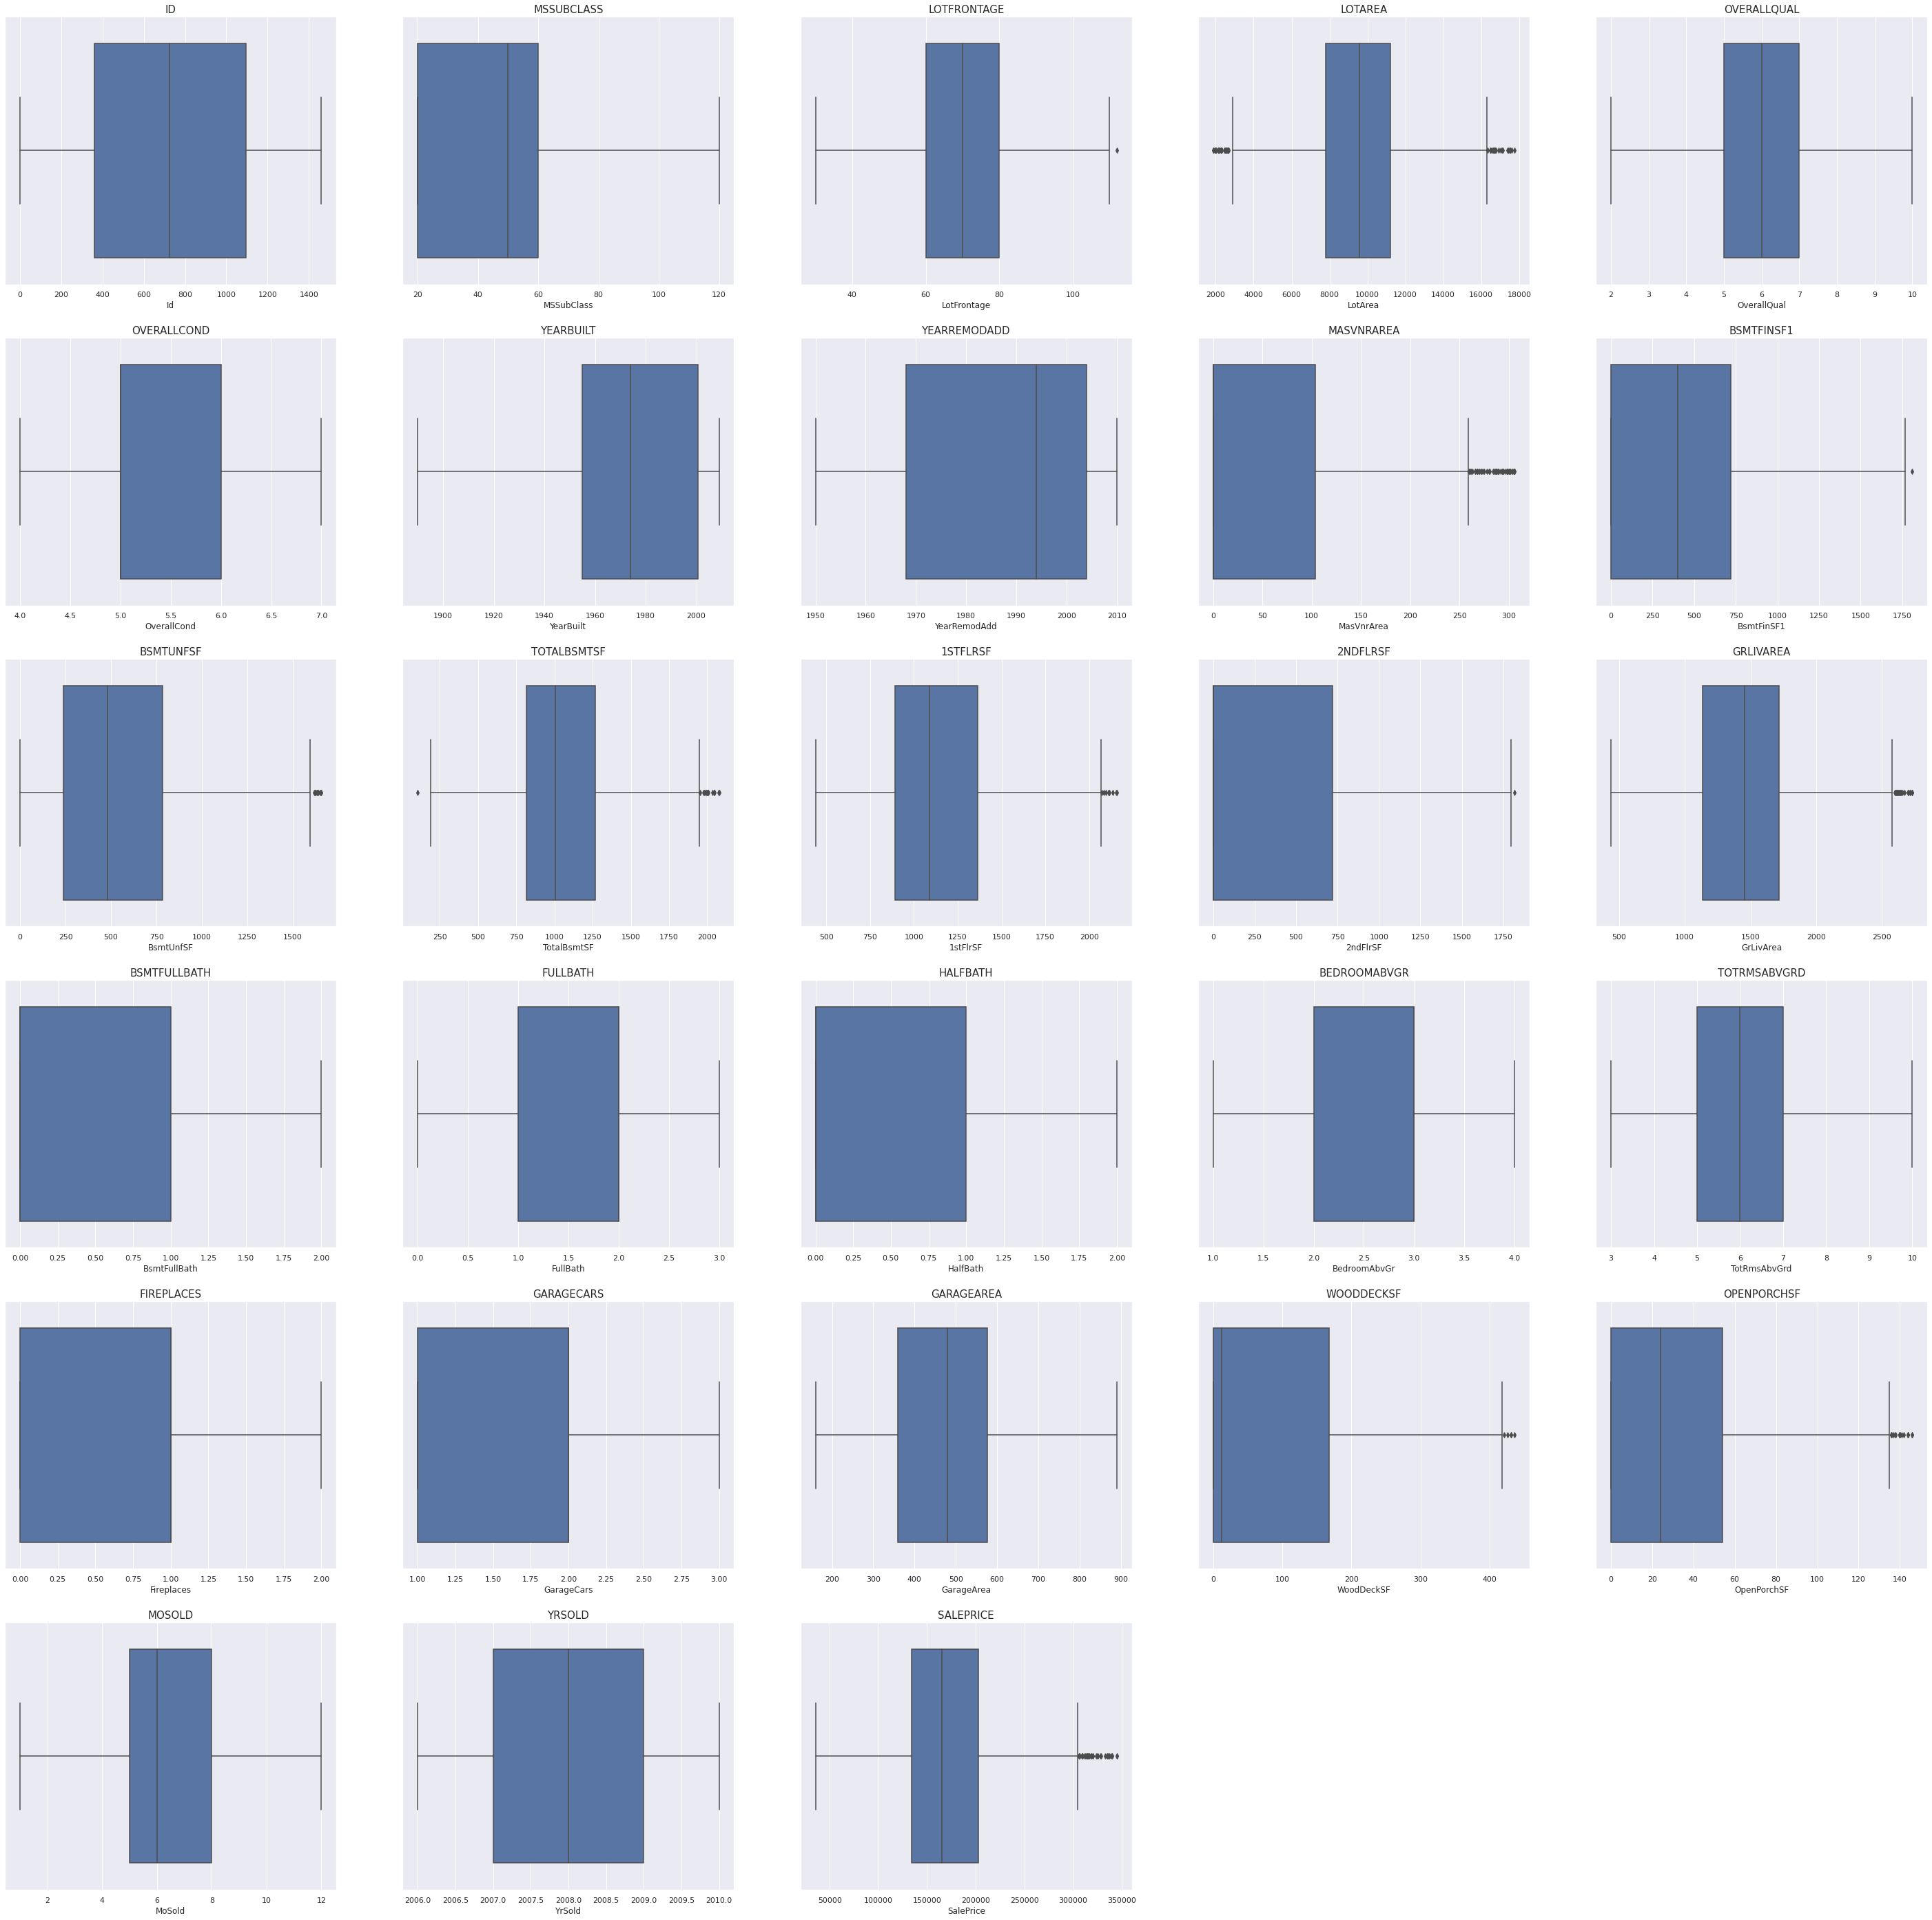

In [55]:
feature = data.select_dtypes("number").columns

a,b,c = 6,5,1

plt.figure(figsize = (50,50))
for i in feature:
    plt.subplot(a,b,c)
    sns.boxplot(data[i])
    plt.title(i.upper(), fontsize = 15)
    c = c+1
plt.show()

In [56]:
data.drop("MasVnrArea", axis = 1, inplace = True)

In [57]:
features = data.select_dtypes("number").columns
for i in features:
    n25, n50, n75 = np.percentile(data[i], [25,50,75])
    iqr = n75 - n25
    lb = n25 - (1.5*iqr)
    ub = n75 + (1.5*iqr)
    outliers = len(data[(data[i]<lb)|(data[i]>ub)])
    if outliers>0:
        indx = data[(data[i]<lb)|(data[i]>ub)].index
        for j in indx:
            data.drop(j, axis = 0, inplace = True)

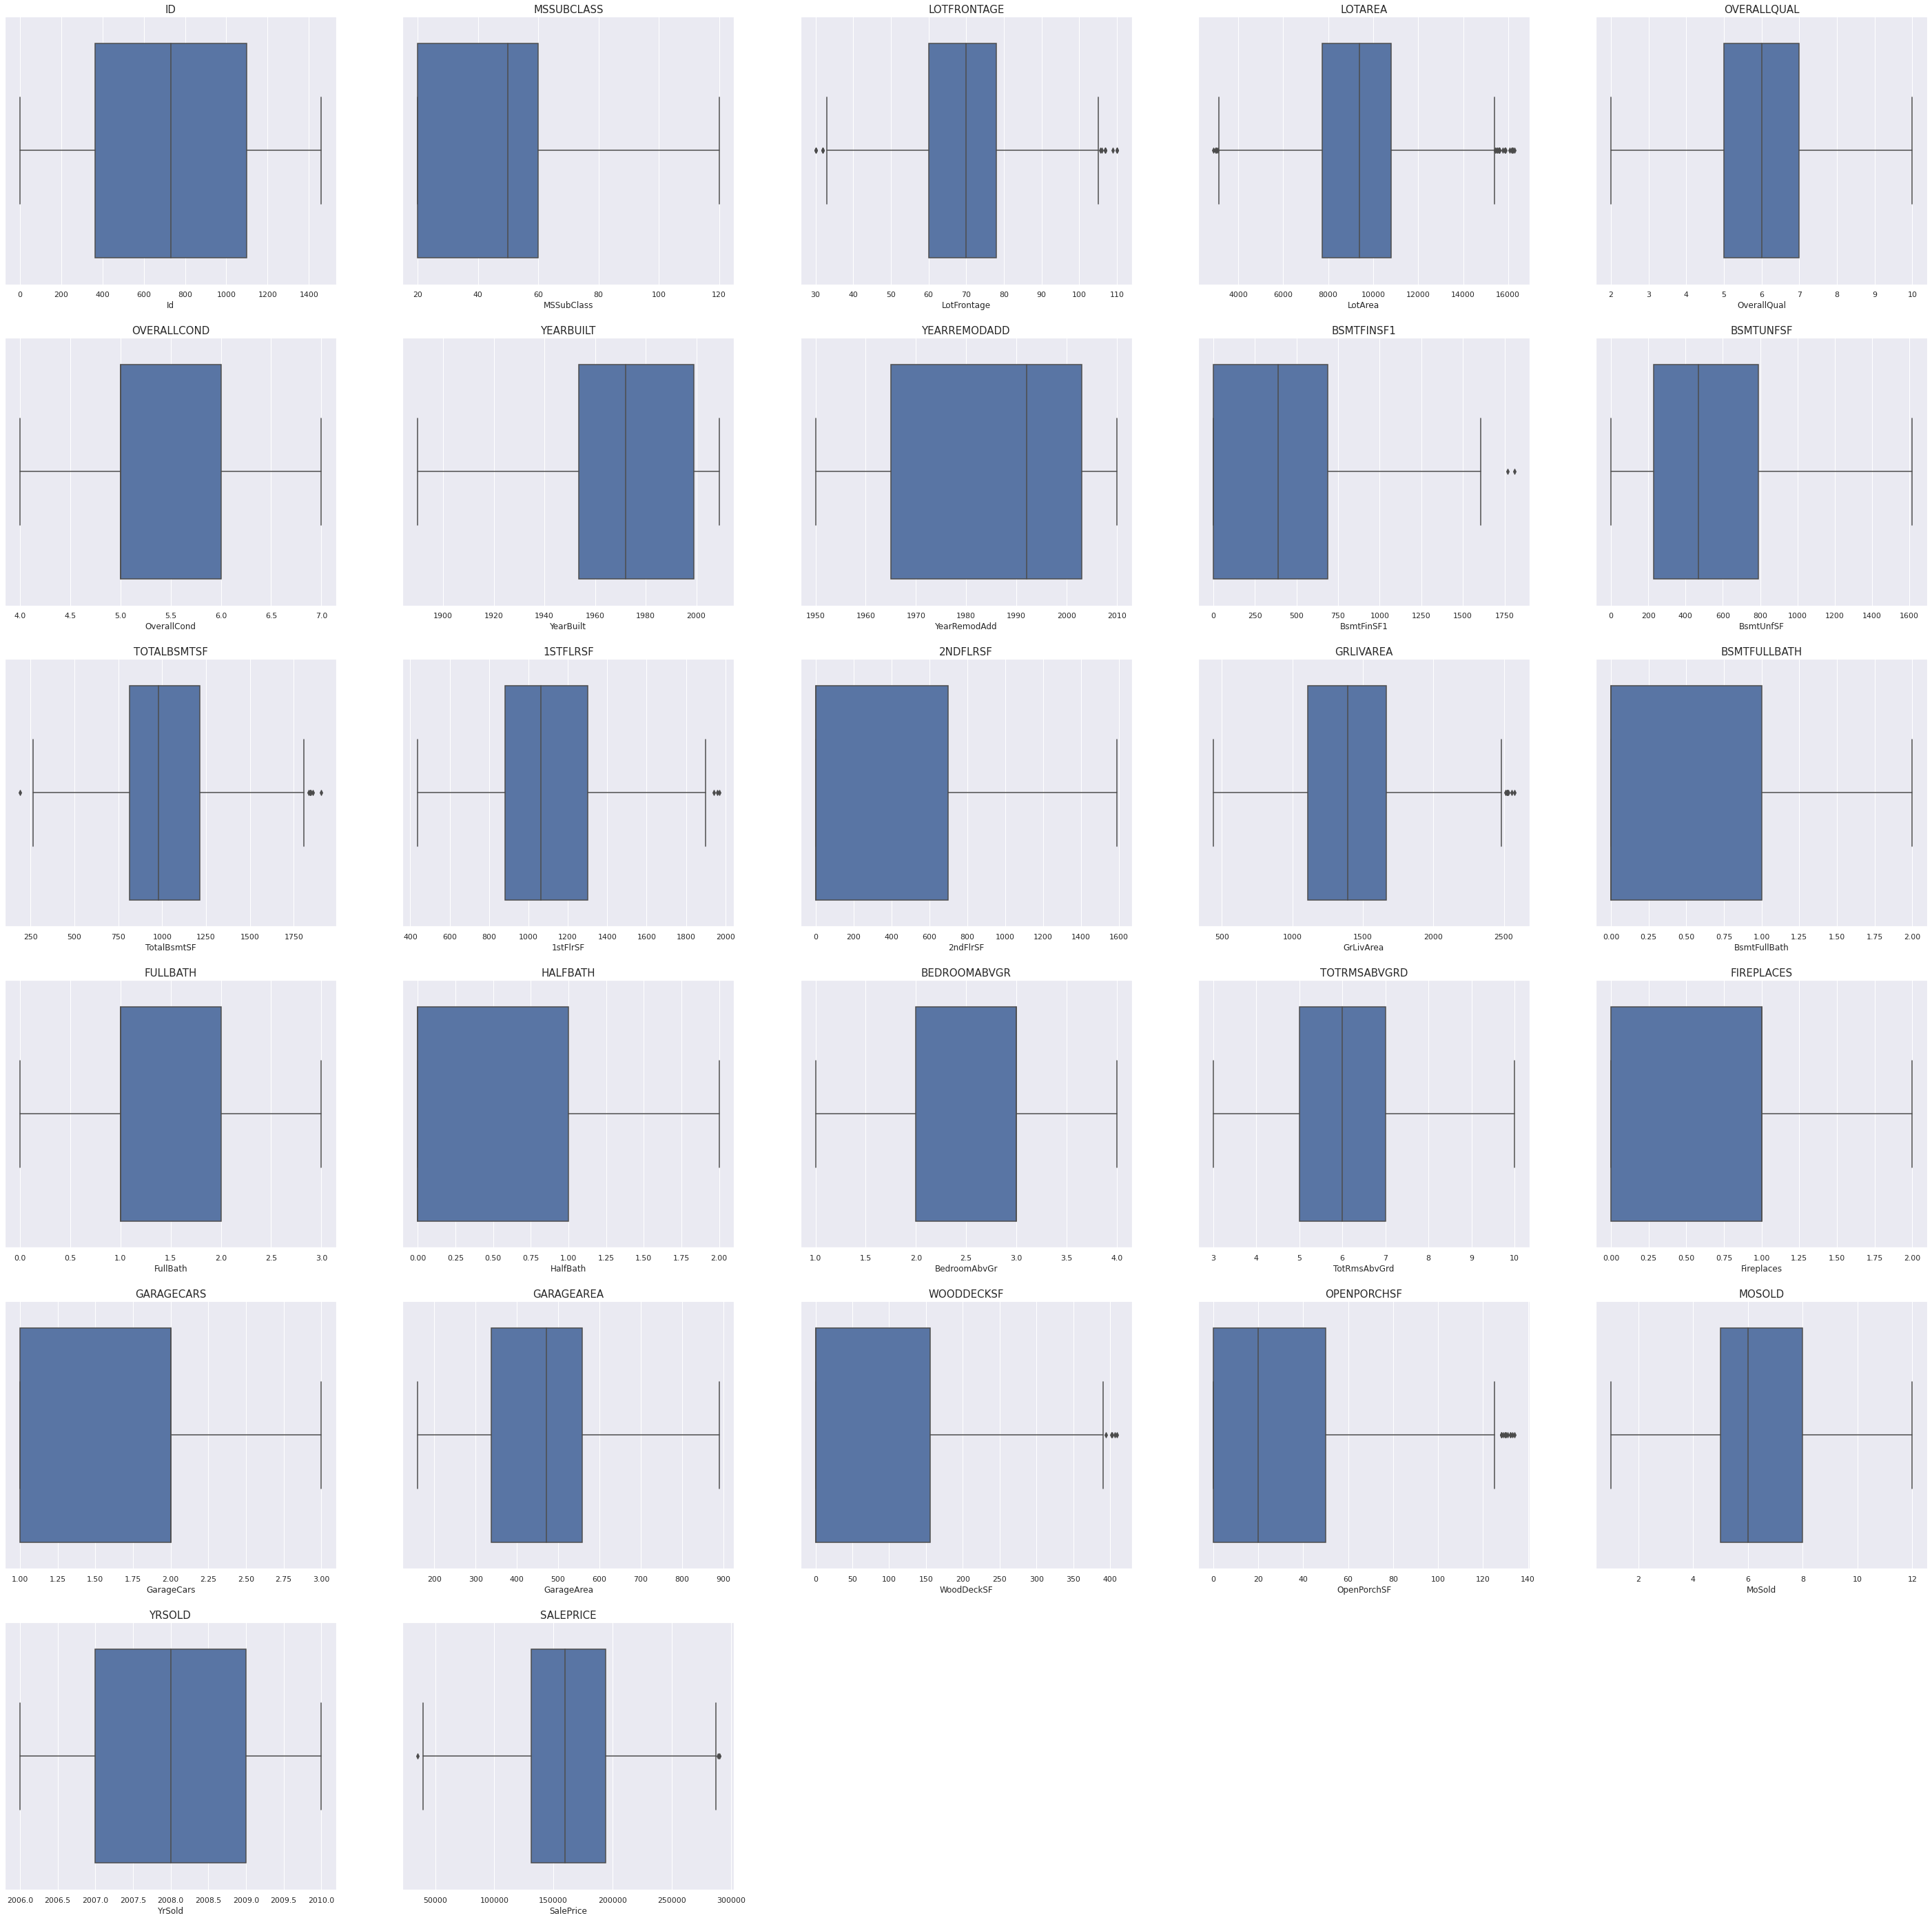

In [58]:
feature = data.select_dtypes("number").columns

a,b,c = 6,5,1

plt.figure(figsize = (50,50))
for i in feature:
    plt.subplot(a,b,c)
    sns.boxplot(data[i])
    plt.title(i.upper(), fontsize = 15)
    c = c+1
plt.show()

In [59]:
obj_feat = data.select_dtypes("object").columns
unique_categories = dict()
for i in obj_feat:
    count = data[i].nunique()
    unique_categories.update({i:count})

length = pd.DataFrame(unique_categories, index = ["count"]).T
more_unique = length[length["count"] >= 10].index

for i in more_unique:
    data.drop(i, axis = 1, inplace = True)

In [60]:
final_table = pd.get_dummies(data, drop_first = True)
final_table

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60.0,65.0,8450.0,7.0,5.000000,2003.0,2003.0,706.0,150.0,...,0,0,0,0,1,0,0,0,1,0
1,2,20.0,80.0,9600.0,6.0,5.596413,1976.0,1976.0,978.0,284.0,...,0,0,0,0,1,0,0,0,1,0
2,3,60.0,68.0,11250.0,7.0,5.000000,2001.0,2002.0,486.0,434.0,...,0,0,0,0,1,0,0,0,1,0
3,4,70.0,60.0,9550.0,7.0,5.000000,1915.0,1970.0,216.0,540.0,...,0,0,0,0,1,0,0,0,0,0
5,6,50.0,85.0,14115.0,5.0,5.000000,1993.0,1995.0,732.0,64.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20.0,62.0,7500.0,7.0,5.000000,2004.0,2005.0,410.0,811.0,...,0,0,0,0,1,0,0,0,1,0
1455,1456,60.0,62.0,7917.0,6.0,5.000000,1999.0,2000.0,0.0,953.0,...,0,0,0,0,1,0,0,0,1,0
1457,1458,70.0,66.0,9042.0,7.0,5.457806,1941.0,2006.0,275.0,877.0,...,0,0,0,0,1,0,0,0,1,0
1458,1459,20.0,68.0,9717.0,5.0,6.000000,1950.0,1996.0,49.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [61]:
final_table["SalePrice"]

0       208500.0
1       181500.0
2       223500.0
3       140000.0
5       143000.0
          ...   
1454    185000.0
1455    175000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1059, dtype: float64

In [62]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm

In [63]:
np.array(final_table.columns)

array(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod',
       'LandSlope_Sev', 'Condition1_Feedr', 'Condition1_Norm',
       'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe',
       'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn',
       'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosN',
       'Conditi

In [65]:
x = final_table.drop(["SalePrice","Id"], axis = 1)
scaled = StandardScaler().fit_transform(x)
x[x.columns] = scaled
x = sm.add_constant(x)
y = final_table["SalePrice"]
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     34.29
Date:                Mon, 08 Nov 2021   Prob (F-statistic):          2.37e-293
Time:                        16:12:33   Log-Likelihood:                -11868.
No. Observations:                1059   AIC:                         2.406e+04
Df Residuals:                     897   BIC:                         2.486e+04
Df Model:                         161                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.659e+05    594.844    278.879      0.000    1.65e+05    1.67e+05
MSSubClass             3790.5120   1299.288      2.917      0.004    1240.513    6340.511
LotFrontage            2334.6241    960.303      2.431      0.015     449.923    4219.326
LotArea                2920.7818    958.855      3.046      0.002    1038.922    4802.642
OverallQual            7116.7842   1172.787      6.068      0.000    4815.059    9418.510
OverallCond            3724.9682    768.843      4.845      0.000    2216.027    5233.909
YearBuilt              2636.3793   1753.111      1.504      0.133    -804.299    6077.057
YearRemodAdd           3835.0155   1018.482      3.765      0.000    1836.129    5833.902
BsmtFinSF1             -866.4560   1757.045     -0.493      0.622   -4314.854    2581.942
BsmtUnfSF             -4173.5328   1711.830     -2.438      0.015   -7533.191    -813.874
TotalBsmtSF            1.152e+04   1836.919      6.271      0.000    7914.742    1.51e+04
1stFlrSF              -2121.5996   1810.556     -1.172      0.242   -5675.018    1431.819
2ndFlrSF               1.087e+04   2543.136      4.276      0.000    5882.500    1.59e+04
GrLivArea              1.538e+04   1888.955      8.141      0.000    1.17e+04    1.91e+04
BsmtFullBath            530.3356    923.492      0.574      0.566   -1282.122    2342.793
FullBath               -549.9612   1133.212     -0.485      0.628   -2774.016    1674.094
HalfBath              -1122.5382   1019.840     -1.101      0.271   -3124.089     879.013
BedroomAbvGr            144.1864    973.945      0.148      0.882   -1767.289    2055.662
TotRmsAbvGrd           -557.1874   1213.967     -0.459      0.646   -2939.734    1825.359
Fireplaces             3106.2292    796.910      3.898      0.000    1542.203    4670.255
GarageCars              361.3883   1272.916      0.284      0.777   -2136.853    2859.630
GarageArea             2952.1318   1186.021      2.489      0.013     624.433    5279.830
WoodDeckSF              458.2691    692.417      0.662      0.508    -900.677    1817.216
OpenPorchSF            2183.3128    749.465      2.913      0.004     712.404    3654.221
MoSold                  241.8989    654.825      0.369      0.712   -1043.269    1527.067
YrSold                 -659.1172    674.120     -0.978      0.328   -1982.154     663.919
MSZoning_FV            9740.5944   1657.081      5.878      0.000    6488.387     1.3e+04
MSZoning_RH            3978.4912    994.574      4.000      0.000    2026.527    5930.455
MSZoning_RL            1.606e+04   3412.658      4.705      0.000    9358.633    2.28e+04
MSZoning_RM             1.13e+04   3034.124      3.724      0.000    5344.715    1.73e+04
Street_Pave           -1318.7084    848.500     -1.554      0.120   -2983.986     346.569
LotShape_IR2           

In [66]:
x = final_table[['LotArea','OverallCond', 'YearRemodAdd', 'BsmtFinSF1',
       'TotalBsmtSF', 'GrLivArea','Fireplaces','MSZoning_FV', 
       'MSZoning_RL', 'RoofMatl_CompShg', 'ExterQual_Gd', 'ExterQual_TA',
       'BsmtQual_Fa', 'BsmtQual_TA', 'CentralAir_Y',
       'GarageFinish_Unf']]
scaled = StandardScaler().fit_transform(x)
x[x.columns] = scaled
x = sm.add_constant(x)
y = final_table["SalePrice"]
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     237.5
Date:                Mon, 08 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:12:33   Log-Likelihood:                -12096.
No. Observations:                1059   AIC:                         2.423e+04
Df Residuals:                    1042   BIC:                         2.431e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.659e+05    684.815    242.240      0.000    1.65e+05    1.67e+05
LotArea           3277.4649    786.942      4.165      0.000    1733.294    4821.636
OverallCond       4414.4215    748.889      5.895      0.000    2944.919    5883.924
YearRemodAdd      6534.3316    907.975      7.197      0.000    4752.665    8315.999
BsmtFinSF1        3990.2439    763.764      5.224      0.000    2491.554    5488.934
TotalBsmtSF       7053.4187    827.551      8.523      0.000    5429.562    8677.275
GrLivArea          1.82e+04    852.786     21.341      0.000    1.65e+04    1.99e+04
Fireplaces        4962.3943    776.888      6.388      0.000    3437.951    6486.837
MSZoning_FV       4536.0829    778.646      5.826      0.000    3008.190    6063.976
MSZoning_RL       4370.5794    859.046      5.088      0.000    2684.922    6056.237
RoofMatl_CompShg -1774.2022    696.992     -2.546      0.011   -3141.870    -406.534
ExterQual_Gd      1.794e+04   2164.481      8.287      0.000    1.37e+04    2.22e+04
ExterQual_TA      7919.9867   2217.982      3.571      0.000    3567.767    1.23e+04
BsmtQual_Fa      -2834.5099    764.719     -3.707      0.000   -4335.074   -1333.946
BsmtQual_TA      -6802.2572    978.795     -6.950      0.000   -8722.891   -4881.624
CentralAir_Y      2770.7687    749.034      3.699      0.000    1300.981    4240.556
GarageFinish_Unf -4140.4660    884.033     -4.684      0.000   -5875.154   -2405.778
==============================================================================
Omnibus:                       46.004   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.693
Skew:                          -0.141   Prob(JB):                     5.08e-28
Kurtosis:                       4.664   Cond. No.                         8.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
for i in range(len(x.columns)):
    vif = variance_inflation_factor(x.values,i)
    print(i, x.columns[i], vif)

0 const 0.9999999999999998
1 LotArea 1.3204988145999206
2 OverallCond 1.1958816832323902
3 YearRemodAdd 1.7579255237026903
4 BsmtFinSF1 1.2438586005446735
5 TotalBsmtSF 1.4603023161075979
6 GrLivArea 1.5507197786462747
7 Fireplaces 1.2869737740955924
8 MSZoning_FV 1.292806206556448
9 MSZoning_RL 1.573570193432598
10 RoofMatl_CompShg 1.0358786279937373
11 ExterQual_Gd 9.989890437927107
12 ExterQual_TA 10.489844105642126
13 BsmtQual_Fa 1.2469715702145014
14 BsmtQual_TA 2.042849458544972
15 CentralAir_Y 1.1963446388676777
16 GarageFinish_Unf 1.6664411094672935


## ***CONTINUE...***